[View in Colaboratory](https://colab.research.google.com/github/tadasi12/dev/blob/master/Deep_Embedding_clustering.ipynb)

# 0.インストール

## Google drive をマウントする

In [0]:
# 必要なパッケージを取得
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Colabratory用の認証トークンの生成
# 以下のコードを実行すると認証のリンクが表示され、リンク先に行って認証を行います。
from google.colab import auth
auth.authenticate_user()

In [3]:
# Drive FUSE library用の証明書の生成
# 以下のコードを実行すると認証のリンクが表示され、リンク先で認証を行います。
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Google Drive をマウントする
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# google drive の PYファイルを import するのに必要
import sys
sys.path.append('drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master') 

## 必要なモジュールをインストールする

In [5]:
!pip install cupy-cuda80==4.0.0b4 
!pip install chainer==4.0.0b4

    100% |████████████████████████████████| 205.4MB 141kB/s 
    100% |████████████████████████████████| 81kB 19.2MB/s 
    100% |████████████████████████████████| 378kB 13.3MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/89/2e/12/fe6441d846a967c24ded700e140bc2a71f56044199b72f33dc
  Running setup.py bdist_wheel for filelock ... - done
  Stored in directory: /content/.cache/pip/wheels/35/ba/67/4cc48738870c3b54f9e3b5d78bf9de130befb70c1d359faf8b
Successfully built chainer filelock


In [6]:
!pip install easydict
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install cupy-cuda80 chainer

  Running setup.py bdist_wheel for easydict ... - done
  Stored in directory: /content/.cache/pip/wheels/58/40/dd/87bc05b3d56641ccb8f099babf6ff5faed5db5c03c5d837450
Successfully built easydict
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 0s (61.0 MB/s)

78Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 19833 files and director

In [8]:
ls img |wc -l

28000


In [0]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random
import os

%matplotlib inline

def resizeRemove(img):
    h, w = img.height, img.width
    flg = random.randrange(2)
    scale = None
    
    if flg == 0: # 縮小
        scale = random.uniform(0.8, 1.0)
    
    else: # 拡大
        max_rate = (w-25) / 50
        scale = random.uniform(1.0, max_rate)
    
    resize = int(scale * 50)
    max_x = int((w-resize) * 0.7)
    x = random.randint(10, max_x)
    y = random.randint(10, max_x)
    
    return x, y, resize
    
def mkEllipse(img, flg):
    draw = ImageDraw.Draw(img)
    x, y, w = resizeRemove(img)
    h = w

    if flg:
        draw.ellipse((x, y, x+w, y+h), fill=(255, 255, 255)) # 楕円
    else:
        draw.ellipse((x, y, x+w, y+h), fill=(255, 0, 0)) # 楕円
    
def mkRectangle(img, flg):
    draw = ImageDraw.Draw(img)
    x, y, w = resizeRemove(img)
    h = w
    
    if flg:
        draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255)) # 四角
    else:
        draw.rectangle((x, y, x+w, y+h), fill=(255, 0, 0)) # 四角

    
if not os.path.exists("./img"):
    os.makedirs("./img")    
    
i = 0
for x in range(7000):
    
    number_padded = str('{0:04d}'.format(i))

    img = Image.new('RGB', (100, 100), (0, 0, 0))
    mkRectangle(img, True)
    img = img.resize((28, 28))
    img.save('img/img_rectangle_' + number_padded + '.JPG')

    img1 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkEllipse(img1, True)
    img1 = img1.resize((28, 28))
    img1.save('img/img_ellipse_' + number_padded + '.JPG')

    img2 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkRectangle(img2, False)
    img2 = img2.resize((28, 28))
    img2.save('img/img_rectangle_red_' + number_padded + '.JPG')

    img3 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkEllipse(img3, False)
    img3 = img3.resize((28, 28))
    img3.save('img/img_ellipse_red_' + number_padded + '.JPG')

    i+=1

In [0]:
!cp 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master/StackedDenoisingAutoEncoder-seed0.model' ./

In [12]:
ls

datalab/  drive/  img/  StackedDenoisingAutoEncoder-seed0.model  text.txt


# 1.事前学習

In [62]:
# coding:utf-8
import argparse

import chainer
import chainer.links as L
from chainer.datasets import mnist, tuple_dataset
from chainer import iterators
from chainer import optimizers
from chainer import training
from chainer import serializers
from chainer.training import extensions
from chainer.dataset import convert
from chainer.functions.loss.mean_squared_error import mean_squared_error
import cupy as cp
import numpy as np

from change_learning_rate import ChangeLearningRate
from stacked_denoising_autoencoder import StackedDenoisingAutoEncoder

import easydict
import glob

def load_image():
    filepaths = glob.glob('img/*.JPG')
    filepaths = [s for s in filepaths if 'red' not in s]
    f = open('text.txt', 'w') # 追記モードで開く    
    f.close()

    i = 0
    
    imageData = []
    labelData = []

    for filepath in filepaths:
        basename = os.path.basename(filepath).split('.')[0]
        img = Image.open(filepath).convert('L')  #Pillowで読み込み。'L'はグレースケールを意味する
        img = img.resize((28, 28)) # 32x32xにリサイズ
        label = i # ラベル(ファイル名)

        x = np.asarray(np.float32(img)/255.0)
        x = x.reshape(28*28) # (チャネル、高さ、横幅)
        t = np.array(i, dtype=np.int32) 

        #datasets.append((x, t)) # xとtをタプルでリストに入れる
        imageData.append(x)
        labelData.append(t)
        f = open('text.txt', 'a') # 追記モードで開く
        f.write(str(i) + ', ' + basename + '\n') # 引数の文字列をファイルに書き込む
        f.close() # 
        
        i += 1
    threshold = np.int32(len(imageData)/8*7)
#     random.shuffle(datasets) # シャッフル
#     train = datasets[:1000] # 最初の千個を学習用
#     test = datasets[1000:1100] # 千個めから1100個目までをテスト用
    return tuple_dataset.TupleDataset(imageData, labelData), None
    #return datasets, None # 学習用、テスト用に分けず作成したデータセットごと返す


def pretraining():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--gpu', type=int, default=-1)
#     parser.add_argument('--seed', type=int, default=0)
#     parser.add_argument('--batchsize', type=int, default=256)
#     args = parser.parse_args()

    args = easydict.EasyDict({
      "gpu": 0,
      "seed": 0,
      "batchsize": 256
    })    
    xp = np
    gpu_id = args.gpu
    seed = args.seed
    train, _ = load_image() #mnist.get_mnist()
    train, _ = convert.concat_examples(train, device=gpu_id)
    batchsize = args.batchsize
    model = StackedDenoisingAutoEncoder(input_dim=train.shape[1])
    if chainer.cuda.available and args.gpu >= 0:
        xp = cp
        model.to_gpu(gpu_id)
    xp.random.seed(seed)

    # Layer-Wise Pretrain
    print("Layer-Wise Pretrain")
    for i, dae in enumerate(model.children()):
        print("Layer {}".format(i+1))
        train_tuple = tuple_dataset.TupleDataset(train, train)
        train_iter = iterators.SerialIterator(train_tuple, batchsize)
        clf = L.Classifier(dae, lossfun=mean_squared_error)
        clf.compute_accuracy = False
        if chainer.cuda.available and args.gpu >= 0:
            clf.to_gpu(gpu_id)
        optimizer = optimizers.MomentumSGD(lr=0.1)
        optimizer.setup(clf)
        updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)
        trainer = training.Trainer(updater, (50000, "iteration"), out="mnist_result")
        trainer.extend(extensions.LogReport())
        trainer.extend(extensions.PrintReport(['iteration', 'main/loss', 'elapsed_time']))
        trainer.extend(ChangeLearningRate(), trigger=(20000, "iteration"))
        trainer.run()
        train = dae.encode(train).data

    # Finetuning
    print("fine tuning")
    with chainer.using_config("train", False):
        train, _ = load_image() #mnist.get_mnist()
        train, _ = convert.concat_examples(train, device=gpu_id)
        train_tuple = tuple_dataset.TupleDataset(train, train)
        train_iter = iterators.SerialIterator(train_tuple, batchsize)
        model = L.Classifier(model, lossfun=mean_squared_error)
        model.compute_accuracy = False
        if chainer.cuda.available and args.gpu >= 0:
            model.to_gpu(gpu_id)
        optimizer = optimizers.MomentumSGD(lr=0.1)
        optimizer.setup(model)
        updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)
        trainer = training.Trainer(updater, (100000, "iteration"), out="mnist_result")
        trainer.extend(extensions.LogReport())
        trainer.extend(extensions.PrintReport(['iteration', 'main/loss', 'elapsed_time']))
        trainer.extend(ChangeLearningRate(), trigger=(20000, "iteration"))
        trainer.run()

    outfile = "drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master/StackedDenoisingAutoEncoder-seed{}.model".format(seed)
    serializers.save_npz(outfile, model.predictor)


if __name__ == '__main__':
    pretraining()

Layer-Wise Pretrain
Layer 1
iteration   main/loss   elapsed_time
55          0.131018    2.59824       
110         0.0638032   3.00986       
165         0.0448879   3.43104       
219         0.0408564   3.83335       
274         0.0392039   4.23508       
329         0.0373876   4.65965       
383         0.0354516   5.17493       
438         0.0335772   5.58829       
493         0.0319108   6.00153       
547         0.0306041   6.48028       
602         0.0295545   6.90682       
657         0.0286558   7.32607       
711         0.0279566   7.73285       
766         0.0273091   8.2277        
821         0.0268046   8.63944       
875         0.0262893   9.04309       
930         0.0258501   9.53513       
985         0.0254261   9.94766       
1040        0.0249958   10.3614       
1094        0.0245978   10.7753       
1149        0.0242142   11.2535       
1204        0.0238567   11.6651       
1258        0.0234917   12.1541       
1313        0.0231472   12.5654       

3665        0.0163555   31.1992       
3719        0.0162784   31.6075       
3774        0.0162066   32.1095       
3829        0.0161319   32.5303       
3883        0.0160733   33.0109       
3938        0.0159951   33.4455       
3993        0.0158888   33.8648       
4047        0.0158351   34.2731       
4102        0.0157761   34.7082       
4157        0.0157147   35.1932       
4211        0.0156837   35.6152       
4266        0.015584    36.1019       
4321        0.0155002   36.5213       
4375        0.0154959   36.9477       
4430        0.0154236   37.3721       
4485        0.0153423   37.8563       
4540        0.0153343   38.2905       
4594        0.0152495   38.7039       
4649        0.0152216   39.1869       
4704        0.015147    39.6119       
4758        0.0150661   40.0136       
4813        0.0150113   40.4251       
4868        0.0150197   40.9201       
4922        0.0149147   41.3266       
4977        0.0148797   41.7391       
5032        0.0148413   4

7383        0.013357    60.8986       
7438        0.0133162   61.3051       
7493        0.013308    61.7814       
7547        0.0132845   62.2016       
7602        0.0132594   62.6871       
7657        0.0132273   63.1119       
7711        0.0131948   63.5182       
7766        0.0131438   63.9289       
7821        0.013143    64.3547       
7875        0.0131024   64.8315       
7930        0.0130564   65.2401       
7985        0.0130796   65.7278       
8040        0.0130516   66.1384       
8094        0.0130155   66.5402       
8149        0.0130329   66.9616       
8204        0.0129714   67.3779       
8258        0.0129491   67.8529       
8313        0.0129255   68.2789       
8368        0.0129058   68.7638       
8422        0.0128866   69.1715       
8477        0.0128905   69.5963       
8532        0.0128403   70.0103       
8586        0.0127854   70.4882       
8641        0.0128067   70.9181       
8696        0.012789    71.3315       
8750        0.0127593   7

11102       0.011996    90.8436       
11157       0.012002    91.2586       
11211       0.0119803   91.7332       
11266       0.0119717   92.1592       
11321       0.0119488   92.5717       
11375       0.0119252   93.0373       
11430       0.0118921   93.4669       
11485       0.0118806   93.8971       
11540       0.0118506   94.3286       
11594       0.0118794   94.806        
11649       0.0118465   95.2283       
11704       0.0118169   95.7346       
11758       0.0118055   96.1561       
11813       0.0117867   96.5675       
11868       0.0117873   96.9951       
11922       0.0117791   97.4048       
11977       0.0117671   97.8759       
12032       0.0117585   98.2969       
12086       0.0117418   98.7825       
12141       0.011717    99.2031       
12196       0.0117162   99.639        
12250       0.0117372   100.052       
12305       0.0117167   100.472       
12360       0.0116784   100.973       
12415       0.0116665   101.4         
12469       0.0116621   1

14821       0.0111658   120.877       
14875       0.0111728   121.292       
14930       0.0111423   121.778       
14985       0.0111397   122.214       
15040       0.0111349   122.632       
15094       0.0111      123.119       
15149       0.0110996   123.537       
15204       0.0111172   123.953       
15258       0.0110798   124.378       
15313       0.0110812   124.869       
15368       0.0110732   125.288       
15422       0.0110719   125.704       
15477       0.011054    126.182       
15532       0.011045    126.592       
15586       0.0110328   127.006       
15641       0.0110114   127.418       
15696       0.0110188   127.899       
15750       0.0109999   128.317       
15805       0.0109712   128.804       
15860       0.0109915   129.219       
15915       0.0109621   129.639       
15969       0.0109595   130.041       
16024       0.0109354   130.451       
16079       0.0109144   130.942       
16133       0.0109305   131.353       
16188       0.0109085   1

18540       0.0105941   150.727       
18594       0.0105536   151.14        
18649       0.010548    151.554       
18704       0.0105705   152.047       
18758       0.0105318   152.45        
18813       0.0105463   152.924       
18868       0.0105379   153.347       
18922       0.0105257   153.752       
18977       0.0105355   154.161       
19032       0.0105034   154.65        
19086       0.0105136   155.055       
19141       0.0105      155.466       
19196       0.0105012   155.968       
19250       0.0104642   156.372       
19305       0.0104674   156.784       
19360       0.0104696   157.211       
19415       0.0104649   157.701       
19469       0.0104707   158.127       
19524       0.0104113   158.55        
19579       0.0104057   159.041       
19633       0.0104554   159.468       
19688       0.0104338   159.886       
19743       0.0104446   160.307       
19797       0.0104173   160.802       
19852       0.0103991   161.229       
19907       0.0103868   1

22258       0.0102998   180.899       
22313       0.0103388   181.322       
22368       0.0103166   181.754       
22422       0.0103125   182.265       
22477       0.0103209   182.694       
22532       0.0103394   183.206       
22586       0.0103269   183.623       
22641       0.0102996   184.052       
22696       0.0103041   184.493       
22750       0.0103586   184.915       
22805       0.0103246   185.416       
22860       0.0103266   185.844       
22915       0.0102995   186.327       
22969       0.0103301   186.735       
23024       0.0103202   187.164       
23079       0.010361    187.594       
23133       0.0103004   188.074       
23188       0.0103326   188.515       
23243       0.0103152   188.95        
23297       0.0103      189.446       
23352       0.010329    189.866       
23407       0.0103171   190.287       
23461       0.0103073   190.715       
23516       0.0103352   191.196       
23571       0.0103201   191.624       
23625       0.0103087   1

25977       0.0102951   211.18        
26032       0.0102667   211.603       
26086       0.0102809   212.033       
26141       0.0102882   212.525       
26196       0.0102831   212.943       
26250       0.0102421   213.439       
26305       0.0102613   213.858       
26360       0.0102682   214.281       
26415       0.0102895   214.717       
26469       0.0102587   215.13        
26524       0.01029     215.637       
26579       0.0102781   216.067       
26633       0.0102701   216.55        
26688       0.0102659   216.988       
26743       0.0102764   217.417       
26797       0.0102581   217.831       
26852       0.0102658   218.269       
26907       0.0102984   218.758       
26961       0.0102702   219.172       
27016       0.0102504   219.687       
27071       0.0102819   220.108       
27125       0.0103018   220.521       
27180       0.0102702   220.961       
27235       0.0102891   221.458       
27290       0.0102769   221.894       
27344       0.0102675   2

29696       0.0102334   241.493       
29750       0.0102498   241.929       
29805       0.0102396   242.354       
29860       0.0102513   242.839       
29915       0.010248    243.28        
29969       0.0102403   243.696       
30024       0.0102426   244.186       
30079       0.01025     244.62        
30133       0.0102378   245.04        
30188       0.0102293   245.458       
30243       0.0102445   245.956       
30297       0.0102403   246.368       
30352       0.0102369   246.866       
30407       0.0102206   247.284       
30461       0.0102297   247.689       
30516       0.0102428   248.123       
30571       0.010231    248.546       
30625       0.0102198   249.028       
30680       0.0102176   249.465       
30735       0.0102205   249.949       
30790       0.0102221   250.371       
30844       0.0102522   250.794       
30899       0.0102577   251.217       
30954       0.0102417   251.635       
31008       0.0102443   252.13        
31063       0.0101958   2

33415       0.0102122   271.776       
33469       0.0101915   272.215       
33524       0.0102046   272.647       
33579       0.010226    273.16        
33633       0.0102097   273.587       
33688       0.0102061   274.039       
33743       0.0102059   274.554       
33797       0.0101963   274.983       
33852       0.0101825   275.409       
33907       0.0101792   275.851       
33961       0.0102061   276.337       
34016       0.0101937   276.766       
34071       0.0102187   277.204       
34125       0.0102005   277.694       
34180       0.0101857   278.13        
34235       0.0102171   278.557       
34290       0.0101996   278.979       
34344       0.0101717   279.484       
34399       0.0101895   279.906       
34454       0.010159    280.328       
34508       0.0101755   280.825       
34563       0.0101979   281.26        
34618       0.0101615   281.696       
34672       0.0101862   282.129       
34727       0.0101677   282.621       
34782       0.0102142   2

37133       0.0101423   302.433       
37188       0.0101656   302.858       
37243       0.0101744   303.304       
37297       0.0101681   303.729       
37352       0.0101419   304.213       
37407       0.0101741   304.64        
37461       0.0101485   305.116       
37516       0.0101166   305.537       
37571       0.0101524   305.978       
37625       0.0101594   306.411       
37680       0.0101651   306.922       
37735       0.0101406   307.355       
37790       0.0101512   307.787       
37844       0.0101882   308.289       
37899       0.0101724   308.719       
37954       0.0101828   309.153       
38008       0.01014     309.591       
38063       0.0101544   310.094       
38118       0.0101808   310.529       
38172       0.0101389   310.965       
38227       0.0101569   311.466       
38282       0.01014     311.914       
38336       0.0101727   312.341       
38391       0.0101482   312.776       
38446       0.0101225   313.295       
38500       0.0101505   3

40852       0.0101256   333.27        
40907       0.0101529   333.709       
40961       0.0101182   334.135       
41016       0.0101124   334.576       
41071       0.0101539   335.08        
41125       0.0101259   335.509       
41180       0.0101003   336.023       
41235       0.0100992   336.451       
41290       0.0101713   336.896       
41344       0.0101111   337.325       
41399       0.0101567   337.758       
41454       0.010118    338.277       
41508       0.0101109   338.702       
41563       0.0100976   339.202       
41618       0.01013     339.648       
41672       0.0101245   340.073       
41727       0.01012     340.508       
41782       0.0101521   341.024       
41836       0.0101187   341.455       
41891       0.0101379   341.9         
41946       0.0101264   342.404       
42000       0.0101104   342.832       
42055       0.0100997   343.282       
42110       0.0101429   343.712       
42165       0.0101289   344.215       
42219       0.0101107   3

44571       0.0101074   364.226       
44625       0.0101343   364.667       
44680       0.0101326   365.108       
44735       0.0101122   365.542       
44790       0.0101386   366.058       
44844       0.0101345   366.501       
44899       0.0101301   367.027       
44954       0.0101245   367.468       
45008       0.0101216   367.898       
45063       0.0101281   368.354       
45118       0.0101197   368.787       
45172       0.0101105   369.286       
45227       0.0101187   369.731       
45282       0.0101164   370.236       
45336       0.010141    370.678       
45391       0.0101317   371.117       
45446       0.010104    371.543       
45500       0.0101055   371.974       
45555       0.0101493   372.472       
45610       0.0101043   372.899       
45665       0.010123    373.408       
45719       0.0101048   373.837       
45774       0.0101401   374.286       
45829       0.0101241   374.733       
45883       0.010116    375.22        
45938       0.0101416   3

48290       0.0101354   395.279       
48344       0.0101151   395.719       
48399       0.0101047   396.153       
48454       0.0101036   396.591       
48508       0.0101318   397.098       
48563       0.0101302   397.542       
48618       0.0101016   397.976       
48672       0.0101185   398.48        
48727       0.0101447   398.917       
48782       0.0100922   399.365       
48836       0.0101209   399.794       
48891       0.010121    400.297       
48946       0.0101404   400.747       
49000       0.010125    401.161       
49055       0.0101117   401.643       
49110       0.010102    402.074       
49165       0.0101269   402.499       
49219       0.0101089   402.926       
49274       0.0101594   403.441       
49329       0.0101328   403.877       
49383       0.0101      404.388       
49438       0.0101141   404.821       
49493       0.0101057   405.254       
49547       0.0101247   405.691       
49602       0.0101017   406.13        
49657       0.0101076   4

1969        0.0121108   16.3246       
2024        0.011831    16.757        
2079        0.01159     17.2664       
2133        0.0113232   17.7175       
2188        0.0111159   18.1532       
2243        0.0109226   18.6034       
2297        0.0106947   19.0321       
2352        0.0105074   19.5371       
2407        0.0103084   19.9877       
2461        0.010134    20.4815       
2516        0.00995334  20.9155       
2571        0.00979274  21.3604       
2625        0.00966224  21.7919       
2680        0.00950677  22.2298       
2735        0.0093917   22.7409       
2790        0.00922085  23.1788       
2844        0.00910191  23.6969       
2899        0.00894112  24.1353       
2954        0.00877199  24.5697       
3008        0.00865883  25.0122       
3063        0.00852179  25.4477       
3118        0.00843218  25.9441       
3172        0.00831719  26.3882       
3227        0.00820878  26.8881       
3282        0.00812085  27.3305       
3336        0.00805754  2

5688        0.0057981   47.2687       
5743        0.00576849  47.7156       
5797        0.00573295  48.2073       
5852        0.00570318  48.6538       
5907        0.00567995  49.088        
5961        0.00566547  49.5816       
6016        0.00561716  50.027        
6071        0.00559226  50.4607       
6125        0.00558347  50.8909       
6180        0.00553949  51.4094       
6235        0.00554001  51.8588       
6290        0.00549287  52.3139       
6344        0.00547815  52.8203       
6399        0.00546274  53.2494       
6454        0.00542799  53.6951       
6508        0.00541153  54.1231       
6563        0.00538779  54.6286       
6618        0.00534837  55.0794       
6672        0.00533237  55.5132       
6727        0.00533082  56.0294       
6782        0.00529504  56.4876       
6836        0.00528207  56.913        
6891        0.00527618  57.3509       
6946        0.00524648  57.8439       
7000        0.00522834  58.2605       
7055        0.0052215   5

9407        0.00465329  78.3639       
9461        0.00463544  78.8004       
9516        0.00460991  79.2303       
9571        0.0046099   79.6667       
9625        0.00461189  80.1123       
9680        0.00459627  80.6168       
9735        0.00458872  81.0661       
9790        0.00458503  81.5691       
9844        0.00457858  81.9973       
9899        0.00456975  82.4384       
9954        0.00455481  82.8708       
10008       0.00456608  83.2897       
10063       0.00453879  83.805        
10118       0.00452517  84.2357       
10172       0.00451972  84.7322       
10227       0.0045205   85.1813       
10282       0.00449687  85.6187       
10336       0.00449863  86.0571       
10391       0.00449342  86.488        
10446       0.0044858   86.9789       
10500       0.00447363  87.4071       
10555       0.00447435  87.9036       
10610       0.00444509  88.334        
10665       0.00445285  88.7811       
10719       0.00442633  89.2085       
10774       0.00444182  8

13125       0.00415241  109.37        
13180       0.00414654  109.82        
13235       0.00414683  110.268       
13290       0.00415067  110.778       
13344       0.00415896  111.216       
13399       0.00413651  111.655       
13454       0.00411961  112.092       
13508       0.004078    112.595       
13563       0.00405332  113.035       
13618       0.00403361  113.472       
13672       0.00401649  113.979       
13727       0.00400166  114.41        
13782       0.00396877  114.854       
13836       0.00397903  115.277       
13891       0.00396326  115.778       
13946       0.00396564  116.22        
14000       0.00394684  116.645       
14055       0.00394619  117.146       
14110       0.00395049  117.593       
14165       0.00393561  118.032       
14219       0.00394036  118.464       
14274       0.00392786  118.979       
14329       0.0039069   119.413       
14383       0.00389895  119.856       
14438       0.00391124  120.361       
14493       0.00389795  1

16844       0.00371856  140.538       
16899       0.00370324  140.979       
16954       0.00371952  141.495       
17008       0.00371477  141.928       
17063       0.00370136  142.381       
17118       0.00370413  142.898       
17172       0.00369943  143.333       
17227       0.00369459  143.784       
17282       0.00367321  144.23        
17336       0.00368339  144.668       
17391       0.0036719   145.202       
17446       0.00367707  145.66        
17500       0.0036839   146.176       
17555       0.00366224  146.614       
17610       0.00366929  147.046       
17665       0.00366264  147.496       
17719       0.00367366  147.928       
17774       0.00366095  148.444       
17829       0.00364981  148.897       
17883       0.00365348  149.397       
17938       0.00364158  149.856       
17993       0.00365289  150.29        
18047       0.00363761  150.712       
18102       0.00364254  151.16        
18157       0.00363175  151.657       
18211       0.00363786  1

20563       0.0035368   172.044       
20618       0.00353642  172.498       
20672       0.00353049  172.934       
20727       0.00351357  173.373       
20782       0.00352201  173.828       
20836       0.00353086  174.325       
20891       0.00352087  174.764       
20946       0.00351856  175.211       
21000       0.00354003  175.708       
21055       0.00353175  176.163       
21110       0.00352449  176.604       
21165       0.00353343  177.048       
21219       0.00352535  177.557       
21274       0.0035319   177.999       
21329       0.00351856  178.445       
21383       0.00351942  178.95        
21438       0.00353537  179.393       
21493       0.00352002  179.851       
21547       0.00352793  180.288       
21602       0.00352703  180.802       
21657       0.00351159  181.259       
21711       0.00353051  181.698       
21766       0.00352836  182.208       
21821       0.00351447  182.665       
21875       0.00350117  183.09        
21930       0.00352196  1

24282       0.00351986  203.435       
24336       0.00351685  203.881       
24391       0.00352042  204.318       
24446       0.0035217   204.846       
24500       0.00350774  205.277       
24555       0.00350638  205.713       
24610       0.00349547  206.161       
24665       0.00350586  206.675       
24719       0.00350113  207.099       
24774       0.00350943  207.543       
24829       0.00351101  208.056       
24883       0.00352288  208.492       
24938       0.0035153   208.952       
24993       0.00350955  209.39        
25047       0.00350608  209.913       
25102       0.00350735  210.352       
25157       0.00351283  210.787       
25211       0.00350243  211.295       
25266       0.00351446  211.732       
25321       0.00350127  212.168       
25375       0.00349776  212.611       
25430       0.00350208  213.115       
25485       0.00350707  213.567       
25540       0.00350304  214.015       
25594       0.00348977  214.511       
25649       0.00350726  2

28000       0.00348458  234.877       
28055       0.00350154  235.318       
28110       0.00349928  235.756       
28165       0.00350231  236.28        
28219       0.00349929  236.713       
28274       0.00349134  237.216       
28329       0.00348785  237.67        
28383       0.00350448  238.104       
28438       0.00348802  238.556       
28493       0.00348055  239.005       
28547       0.00349093  239.528       
28602       0.00349423  239.989       
28657       0.00348977  240.508       
28711       0.00348765  240.943       
28766       0.00349012  241.389       
28821       0.00350778  241.833       
28875       0.00349141  242.266       
28930       0.00349353  242.795       
28985       0.00348538  243.239       
29040       0.00349822  243.772       
29094       0.00349157  244.21        
29149       0.00348456  244.651       
29204       0.00348046  245.101       
29258       0.00350191  245.528       
29313       0.00348381  246.035       
29368       0.00349289  2

31719       0.00347153  266.577       
31774       0.00347445  267.091       
31829       0.00348063  267.55        
31883       0.00348363  267.986       
31938       0.00347992  268.427       
31993       0.00348021  268.957       
32047       0.00347204  269.398       
32102       0.00347589  269.861       
32157       0.00348103  270.377       
32211       0.0034747   270.815       
32266       0.00348125  271.274       
32321       0.00346892  271.722       
32375       0.00346492  272.231       
32430       0.00347719  272.693       
32485       0.00347549  273.142       
32540       0.00348559  273.67        
32594       0.00346227  274.108       
32649       0.00347108  274.555       
32704       0.00346388  275.016       
32758       0.00347427  275.523       
32813       0.00346023  275.967       
32868       0.00347871  276.428       
32922       0.00347194  276.934       
32977       0.00348673  277.394       
33032       0.00346631  277.844       
33086       0.00348508  2

35438       0.00346039  298.309       
35493       0.00346469  298.855       
35547       0.00344176  299.297       
35602       0.00345551  299.815       
35657       0.00347407  300.267       
35711       0.0034661   300.705       
35766       0.00345241  301.167       
35821       0.00345746  301.608       
35875       0.00346547  302.114       
35930       0.00345223  302.569       
35985       0.00347321  303.089       
36040       0.00346347  303.542       
36094       0.00345458  303.989       
36149       0.00344831  304.434       
36204       0.00345268  304.898       
36258       0.00345335  305.408       
36313       0.00344731  305.858       
36368       0.00346536  306.388       
36422       0.00345412  306.826       
36477       0.0034489   307.268       
36532       0.00343555  307.728       
36586       0.00347306  308.17        
36641       0.00345918  308.704       
36696       0.00346711  309.157       
36750       0.00346112  309.664       
36805       0.00345247  3

39157       0.00343864  330.209       
39211       0.00344638  330.653       
39266       0.0034669   331.111       
39321       0.00343345  331.622       
39375       0.00343668  332.063       
39430       0.00343414  332.528       
39485       0.00346212  333.045       
39540       0.00342032  333.492       
39594       0.00346041  333.942       
39649       0.00344765  334.405       
39704       0.00343585  334.946       
39758       0.00344516  335.388       
39813       0.00345045  335.841       
39868       0.00344583  336.366       
39922       0.0034518   336.806       
39977       0.00345094  337.259       
40032       0.00343639  337.72        
40086       0.00345377  338.226       
40141       0.00343012  338.694       
40196       0.00342973  339.143       
40250       0.00344655  339.642       
40305       0.00343289  340.093       
40360       0.00345192  340.544       
40415       0.00342851  340.988       
40469       0.00343685  341.512       
40524       0.00342299  3

42875       0.0034286   362.076       
42930       0.00343937  362.604       
42985       0.0034325   363.059       
43040       0.00344518  363.506       
43094       0.00343497  363.957       
43149       0.00343139  364.406       
43204       0.00346192  364.942       
43258       0.00343426  365.382       
43313       0.00342619  365.896       
43368       0.00345651  366.353       
43422       0.00346168  366.788       
43477       0.00343205  367.234       
43532       0.00343171  367.694       
43586       0.0034387   368.197       
43641       0.0034249   368.658       
43696       0.00344411  369.172       
43750       0.00344262  369.613       
43805       0.0034442   370.073       
43860       0.00344898  370.527       
43915       0.00343978  370.969       
43969       0.00343571  371.49        
44024       0.00344926  371.936       
44079       0.00343864  372.465       
44133       0.00342963  372.905       
44188       0.00344723  373.353       
44243       0.00344091  3

46594       0.00345577  393.969       
46649       0.00343496  394.477       
46704       0.00344975  394.938       
46758       0.00343608  395.381       
46813       0.00343861  395.902       
46868       0.003438    396.355       
46922       0.00343557  396.8         
46977       0.00344177  397.246       
47032       0.00344132  397.772       
47086       0.00343772  398.214       
47141       0.00343706  398.673       
47196       0.0034299   399.191       
47250       0.00344329  399.628       
47305       0.0034341   400.082       
47360       0.00342559  400.534       
47415       0.00343883  401.06        
47469       0.00343835  401.502       
47524       0.0034384   401.955       
47579       0.00343408  402.491       
47633       0.00343427  402.933       
47688       0.00343456  403.388       
47743       0.00343612  403.849       
47797       0.00343535  404.361       
47852       0.00344374  404.821       
47907       0.00343408  405.274       
47961       0.00344551  4

329         0.0274837   2.77166       
383         0.025101    3.20533       
438         0.0230351   3.64302       
493         0.0213434   4.16769       
547         0.0198194   4.60176       
602         0.0184982   5.05633       
657         0.0173149   5.59057       
711         0.0162923   6.01992       
766         0.0153618   6.46932       
821         0.0145117   6.90888       
875         0.0137671   7.41514       
930         0.013049    7.86419       
985         0.0124112   8.30401       
1040        0.0118551   8.81412       
1094        0.0113038   9.25868       
1149        0.0108279   9.69781       
1204        0.0103891   10.1333       
1258        0.00995873  10.5734       
1313        0.00958447  11.0755       
1368        0.00924586  11.5209       
1422        0.00891787  12.0151       
1477        0.00863794  12.4506       
1532        0.00833529  12.9036       
1586        0.00809976  13.3537       
1641        0.00784478  13.8013       
1696        0.00764377  1

4047        0.00405326  34.2892       
4102        0.00401593  34.7362       
4157        0.00398536  35.2625       
4211        0.00395493  35.7019       
4266        0.00391719  36.146        
4321        0.00389411  36.6128       
4375        0.00385441  37.0425       
4430        0.00383613  37.5653       
4485        0.00381423  38.0175       
4540        0.00379313  38.535        
4594        0.00377044  38.9827       
4649        0.00374215  39.4267       
4704        0.00371604  39.8755       
4758        0.00369264  40.3262       
4813        0.00367433  40.8377       
4868        0.00365523  41.2867       
4922        0.00362788  41.7343       
4977        0.00359157  42.2466       
5032        0.00351529  42.7062       
5086        0.00348117  43.1458       
5141        0.00345003  43.5919       
5196        0.00341583  44.1183       
5250        0.00339546  44.5579       
5305        0.00338445  45.0142       
5360        0.00334935  45.536        
5415        0.00333685  4

7766        0.00281953  65.9265       
7821        0.00280547  66.3788       
7875        0.00279132  66.8201       
7930        0.00278882  67.3385       
7985        0.0027696   67.7923       
8040        0.00277468  68.2324       
8094        0.00276435  68.7319       
8149        0.00275498  69.1808       
8204        0.00273978  69.6172       
8258        0.00273642  70.0487       
8313        0.00272795  70.5718       
8368        0.00272619  71.0107       
8422        0.00270932  71.4557       
8477        0.00270249  71.962        
8532        0.00270123  72.3993       
8586        0.00269073  72.8391       
8641        0.00268289  73.2799       
8696        0.00268918  73.7908       
8750        0.00267835  74.2361       
8805        0.00267439  74.6752       
8860        0.00266942  75.1961       
8915        0.00266277  75.6321       
8969        0.00265244  76.0639       
9024        0.002628    76.5189       
9079        0.00264346  76.9549       
9133        0.00262188  7

11485       0.00241316  97.5213       
11540       0.00241019  97.9689       
11594       0.00239774  98.4645       
11649       0.00239853  98.921        
11704       0.00238788  99.3706       
11758       0.00239146  99.8061       
11813       0.00237845  100.267       
11868       0.00238946  100.776       
11922       0.00238502  101.219       
11977       0.00237073  101.76        
12032       0.00236429  102.202       
12086       0.00236671  102.648       
12141       0.00237525  103.094       
12196       0.00235982  103.535       
12250       0.00235501  104.055       
12305       0.00234729  104.498       
12360       0.00233948  105.024       
12415       0.00234401  105.484       
12469       0.00234783  105.922       
12524       0.00232739  106.369       
12579       0.00233185  106.82        
12633       0.00233182  107.319       
12688       0.00232711  107.772       
12743       0.00232062  108.208       
12797       0.00231857  108.712       
12852       0.002308    1

15204       0.00217673  129.31        
15258       0.00217422  129.745       
15313       0.00217656  130.201       
15368       0.00216594  130.715       
15422       0.00217007  131.153       
15477       0.0021673   131.618       
15532       0.00215874  132.132       
15586       0.00215411  132.569       
15641       0.00215341  133.026       
15696       0.00214554  133.471       
15750       0.0021471   133.984       
15805       0.00213893  134.432       
15860       0.00214168  134.875       
15915       0.00214313  135.409       
15969       0.00214423  135.852       
16024       0.0021342   136.297       
16079       0.00213686  136.754       
16133       0.00212486  137.255       
16188       0.00212557  137.717       
16243       0.00212841  138.16        
16297       0.00212855  138.669       
16352       0.00212497  139.12        
16407       0.0021249   139.568       
16461       0.00211783  140.001       
16516       0.00211538  140.53        
16571       0.00211277  1

18922       0.00199966  161.118       
18977       0.00201582  161.577       
19032       0.00201494  162.112       
19086       0.00200617  162.558       
19141       0.00200576  163.019       
19196       0.00200563  163.477       
19250       0.00200184  163.931       
19305       0.00199769  164.449       
19360       0.0019981   164.904       
19415       0.00199248  165.434       
19469       0.00199497  165.875       
19524       0.00197834  166.327       
19579       0.00198985  166.788       
19633       0.00197866  167.229       
19688       0.00198335  167.76        
19743       0.00199243  168.211       
19797       0.00199125  168.717       
19852       0.00197978  169.169       
19907       0.00198429  169.619       
19961       0.00197919  170.058       
20016       0.00197252  170.518       
20071       0.00196853  171.033       
20125       0.00196796  171.482       
20180       0.00198058  172           
20235       0.00197157  172.445       
20290       0.00197308  1

22641       0.00196397  193.243       
22696       0.00196098  193.697       
22750       0.00196909  194.154       
22805       0.00196525  194.661       
22860       0.00196538  195.097       
22915       0.00195972  195.608       
22969       0.00196136  196.045       
23024       0.00196722  196.511       
23079       0.00196783  196.975       
23133       0.0019758   197.424       
23188       0.00196457  197.945       
23243       0.00196135  198.39        
23297       0.00196657  198.821       
23352       0.00196392  199.351       
23407       0.0019613   199.794       
23461       0.001956    200.238       
23516       0.00195422  200.687       
23571       0.00195997  201.212       
23625       0.0019635   201.67        
23680       0.00196391  202.114       
23735       0.00196324  202.63        
23790       0.00196216  203.092       
23844       0.0019617   203.53        
23899       0.00196645  203.984       
23954       0.00196454  204.497       
24008       0.00196217  2

26360       0.00194872  225.238       
26415       0.00195889  225.694       
26469       0.00194946  226.205       
26524       0.00194997  226.67        
26579       0.00194621  227.125       
26633       0.00194858  227.57        
26688       0.00195211  228.097       
26743       0.00194951  228.551       
26797       0.00194959  229.012       
26852       0.00195367  229.534       
26907       0.0019473   229.983       
26961       0.00195232  230.439       
27016       0.0019456   230.894       
27071       0.00195046  231.419       
27125       0.00195161  231.865       
27180       0.00195512  232.313       
27235       0.00195692  232.834       
27290       0.00194565  233.29        
27344       0.00194219  233.734       
27399       0.00194436  234.2         
27454       0.00194849  234.655       
27508       0.00195315  235.177       
27563       0.00195257  235.632       
27618       0.00193812  236.147       
27672       0.00193917  236.6         
27727       0.00194184  2

30079       0.00193821  257.367       
30133       0.00194536  257.834       
30188       0.00193707  258.291       
30243       0.0019356   258.803       
30297       0.0019356   259.266       
30352       0.00193197  259.782       
30407       0.00193561  260.253       
30461       0.00194124  260.7         
30516       0.00194424  261.152       
30571       0.00193825  261.62        
30625       0.00194382  262.132       
30680       0.0019358   262.587       
30735       0.00193728  263.118       
30790       0.00193424  263.574       
30844       0.00194473  264.035       
30899       0.00193563  264.492       
30954       0.00193848  264.947       
31008       0.00193595  265.474       
31063       0.00193976  265.929       
31118       0.00194065  266.387       
31172       0.00194415  266.92        
31227       0.00193706  267.376       
31282       0.00193612  267.842       
31336       0.00193568  268.29        
31391       0.00193715  268.814       
31446       0.00193287  2

33797       0.0019303   289.676       
33852       0.00192755  290.134       
33907       0.00192366  290.665       
33961       0.00192484  291.102       
34016       0.00192479  291.57        
34071       0.00192023  292.031       
34125       0.00192127  292.539       
34180       0.00192767  293.016       
34235       0.00193003  293.474       
34290       0.00192995  293.999       
34344       0.00192664  294.434       
34399       0.00192595  294.883       
34454       0.00192222  295.347       
34508       0.0019214   295.87        
34563       0.00192951  296.329       
34618       0.00193552  296.795       
34672       0.001926    297.313       
34727       0.00192783  297.785       
34782       0.001922    298.237       
34836       0.00192914  298.679       
34891       0.00191758  299.208       
34946       0.00192583  299.658       
35000       0.00192479  300.099       
35055       0.0019319   300.641       
35110       0.0019158   301.108       
35165       0.00192601  3

37516       0.00191803  321.909       
37571       0.00191396  322.365       
37625       0.00191604  322.829       
37680       0.00192383  323.352       
37735       0.00191168  323.804       
37790       0.0019154   324.333       
37844       0.00191704  324.779       
37899       0.001914    325.246       
37954       0.00192015  325.696       
38008       0.00190902  326.142       
38063       0.00191972  326.682       
38118       0.00191411  327.14        
38172       0.00191182  327.664       
38227       0.00191402  328.12        
38282       0.00191101  328.574       
38336       0.00191708  329.03        
38391       0.00190941  329.486       
38446       0.00191639  330.006       
38500       0.00191186  330.459       
38555       0.0019121   330.975       
38610       0.00190604  331.436       
38665       0.00191713  331.895       
38719       0.00189972  332.345       
38774       0.00191875  332.814       
38829       0.00191144  333.338       
38883       0.00191338  3

41235       0.00190784  354.155       
41290       0.00190959  354.629       
41344       0.00190869  355.169       
41399       0.00191948  355.629       
41454       0.001905    356.094       
41508       0.00190786  356.561       
41563       0.0019124   357.085       
41618       0.00190949  357.548       
41672       0.00190598  358.013       
41727       0.00190719  358.542       
41782       0.00191585  359.015       
41836       0.00191325  359.47        
41891       0.00191113  359.931       
41946       0.00190066  360.469       
42000       0.00190631  360.921       
42055       0.00190665  361.385       
42110       0.00190547  361.924       
42165       0.00191151  362.386       
42219       0.00190836  362.851       
42274       0.00191582  363.313       
42329       0.00190823  363.84        
42383       0.00190858  364.305       
42438       0.00190392  364.769       
42493       0.00191308  365.312       
42547       0.00190626  365.77        
42602       0.00191308  3

44954       0.00190975  386.73        
45008       0.00191109  387.183       
45063       0.00190752  387.719       
45118       0.00191082  388.18        
45172       0.00190098  388.632       
45227       0.00190182  389.166       
45282       0.00190878  389.622       
45336       0.00190507  390.087       
45391       0.00190719  390.576       
45446       0.00190917  391.034       
45500       0.00191152  391.581       
45555       0.00191077  392.046       
45610       0.00189674  392.579       
45665       0.00191007  393.055       
45719       0.00190716  393.513       
45774       0.00190695  393.991       
45829       0.00190683  394.444       
45883       0.001902    394.95        
45938       0.00189799  395.411       
45993       0.00191518  395.928       
46047       0.00191084  396.381       
46102       0.0018996   396.84        
46157       0.00190679  397.3         
46211       0.00190853  397.758       
46266       0.00190498  398.296       
46321       0.00190221  3

48672       0.0019093   419.361       
48727       0.00190725  419.881       
48782       0.00190682  420.354       
48836       0.00190224  420.805       
48891       0.00190077  421.261       
48946       0.00190809  421.733       
49000       0.00191142  422.248       
49055       0.00191095  422.723       
49110       0.00190754  423.185       
49165       0.00190867  423.717       
49219       0.00190957  424.183       
49274       0.00190034  424.644       
49329       0.0019059   425.108       
49383       0.00191498  425.647       
49438       0.00190925  426.111       
49493       0.00190815  426.587       
49547       0.00191024  427.104       
49602       0.00190533  427.562       
49657       0.00190822  428.041       
49711       0.00190332  428.495       
49766       0.00190411  429.034       
49821       0.00190444  429.499       
49875       0.00189973  429.954       
49930       0.00190494  430.493       
49985       0.00189874  430.954       
Layer 4
iteration   main/

2352        0.00746066  18.5381       
2407        0.00745587  18.9335       
2461        0.00743379  19.3477       
2516        0.00742622  19.7588       
2571        0.00741266  20.2299       
2625        0.00739956  20.6476       
2680        0.00739142  21.1243       
2735        0.0073724   21.5274       
2790        0.00735762  21.9429       
2844        0.0073536   22.3434       
2899        0.00733186  22.7516       
2954        0.00732648  23.2416       
3008        0.00730889  23.6472       
3063        0.00729461  24.0665       
3118        0.00727364  24.5439       
3172        0.00726556  24.9486       
3227        0.00724727  25.3691       
3282        0.00723604  25.7775       
3336        0.00720266  26.2495       
3391        0.00719153  26.6767       
3446        0.00717298  27.099        
3500        0.00715272  27.5775       
3555        0.0071374   28.004        
3610        0.00710953  28.4175       
3665        0.0070979   28.8333       
3719        0.00706361  2

6071        0.00608819  47.9887       
6125        0.00606618  48.4613       
6180        0.0060549   48.8781       
6235        0.00604609  49.3074       
6290        0.00601258  49.7904       
6344        0.00600599  50.1977       
6399        0.00599226  50.6249       
6454        0.00596381  51.0428       
6508        0.00596217  51.5093       
6563        0.00594339  51.9362       
6618        0.00592858  52.3553       
6672        0.0059054   52.8397       
6727        0.00589941  53.2568       
6782        0.00588316  53.6726       
6836        0.00586356  54.0975       
6891        0.00585238  54.6039       
6946        0.00582203  55.0296       
7000        0.00581949  55.4554       
7055        0.00580612  55.9486       
7110        0.00579163  56.3698       
7165        0.00576805  56.7979       
7219        0.00575716  57.2156       
7274        0.00574735  57.6318       
7329        0.00572947  58.1377       
7383        0.00571184  58.552        
7438        0.00570563  5

9790        0.00515793  77.7046       
9844        0.00515235  78.1973       
9899        0.00513883  78.6126       
9954        0.00513275  79.0305       
10008       0.00510824  79.4528       
10063       0.00511276  79.8679       
10118       0.00509813  80.3649       
10172       0.00509672  80.7709       
10227       0.00507852  81.2637       
10282       0.0050771   81.6965       
10336       0.00506528  82.1083       
10391       0.00505067  82.5257       
10446       0.00504904  82.9586       
10500       0.00503932  83.4334       
10555       0.00503866  83.8521       
10610       0.00502128  84.3491       
10665       0.00502483  84.7664       
10719       0.0050004   85.1743       
10774       0.00499562  85.6078       
10829       0.00499909  86.0193       
10883       0.00498393  86.4926       
10938       0.00497538  86.9212       
10993       0.00496922  87.3485       
11047       0.00496014  87.8402       
11102       0.0049504   88.2565       
11157       0.00494679  8

13508       0.00471435  107.405       
13563       0.00471824  107.828       
13618       0.00471143  108.241       
13672       0.00471058  108.713       
13727       0.00469733  109.131       
13782       0.00469418  109.535       
13836       0.00469689  110.001       
13891       0.00469331  110.427       
13946       0.00468737  110.858       
14000       0.00467722  111.276       
14055       0.00468643  111.762       
14110       0.00469034  112.179       
14165       0.00467341  112.597       
14219       0.00466744  113.086       
14274       0.00466286  113.501       
14329       0.00465578  113.919       
14383       0.00466672  114.358       
14438       0.00466078  114.842       
14493       0.00465299  115.26        
14547       0.00463671  115.688       
14602       0.0046383   116.166       
14657       0.00463205  116.58        
14711       0.00463561  116.977       
14766       0.0046208   117.386       
14821       0.0046374   117.792       
14875       0.00461915  1

17227       0.00453584  137.202       
17282       0.00451494  137.624       
17336       0.00452395  138.049       
17391       0.00453375  138.535       
17446       0.0045285   138.951       
17500       0.00451481  139.376       
17555       0.00451586  139.792       
17610       0.0045176   140.278       
17665       0.00451141  140.706       
17719       0.00451786  141.115       
17774       0.00450779  141.62        
17829       0.00451243  142.033       
17883       0.00451687  142.437       
17938       0.00450441  142.871       
17993       0.0045056   143.292       
18047       0.00451204  143.769       
18102       0.00450748  144.2         
18157       0.00449961  144.691       
18211       0.00450067  145.102       
18266       0.00449404  145.537       
18321       0.00450073  145.953       
18375       0.00449596  146.371       
18430       0.00449984  146.882       
18485       0.00448563  147.313       
18540       0.00449808  147.738       
18594       0.00450183  1

20946       0.00446203  167.094       
21000       0.00447791  167.494       
21055       0.00448023  167.918       
21110       0.00447481  168.34        
21165       0.0044618   168.752       
21219       0.00447093  169.237       
21274       0.00447096  169.655       
21329       0.00445601  170.141       
21383       0.00447294  170.56        
21438       0.00447621  170.978       
21493       0.00448256  171.394       
21547       0.00447465  171.813       
21602       0.00447444  172.292       
21657       0.00447702  172.71        
21711       0.00447119  173.135       
21766       0.00446943  173.621       
21821       0.004473    174.04        
21875       0.00447104  174.472       
21930       0.00446796  174.891       
21985       0.00447429  175.387       
22040       0.00446262  175.801       
22094       0.00448307  176.212       
22149       0.00446607  176.707       
22204       0.00445608  177.12        
22258       0.00446511  177.536       
22313       0.0044755   1

24665       0.00446156  196.875       
24719       0.00447028  197.284       
24774       0.00446906  197.776       
24829       0.00445822  198.205       
24883       0.00446592  198.613       
24938       0.00447679  199.108       
24993       0.00447669  199.535       
25047       0.00446433  199.945       
25102       0.00446523  200.374       
25157       0.00447907  200.848       
25211       0.00446347  201.27        
25266       0.00446611  201.708       
25321       0.00446168  202.193       
25375       0.00446421  202.611       
25430       0.00446794  203.048       
25485       0.00447371  203.459       
25540       0.00446218  203.868       
25594       0.00445461  204.352       
25649       0.0044665   204.762       
25704       0.0044689   205.244       
25758       0.00447235  205.662       
25813       0.00447214  206.077       
25868       0.00447139  206.504       
25922       0.00447772  206.935       
25977       0.00447123  207.43        
26032       0.00445942  2

28383       0.00446901  226.883       
28438       0.0044533   227.302       
28493       0.00447779  227.791       
28547       0.00444764  228.218       
28602       0.00446657  228.64        
28657       0.00447442  229.066       
28711       0.00446634  229.487       
28766       0.00446991  229.973       
28821       0.0044481   230.403       
28875       0.00446595  230.878       
28930       0.00446191  231.298       
28985       0.00445967  231.731       
29040       0.00446803  232.148       
29094       0.00446543  232.565       
29149       0.00445805  233.06        
29204       0.00447031  233.481       
29258       0.004462    233.891       
29313       0.0044601   234.394       
29368       0.00445311  234.815       
29422       0.0044706   235.227       
29477       0.00446869  235.655       
29532       0.00445878  236.143       
29586       0.00446548  236.561       
29641       0.00445927  236.987       
29696       0.00447919  237.472       
29750       0.00446706  2

32102       0.00446068  256.976       
32157       0.00445452  257.408       
32211       0.00446285  257.841       
32266       0.00446188  258.265       
32321       0.00445022  258.764       
32375       0.00446472  259.193       
32430       0.00447153  259.617       
32485       0.0044679   260.11        
32540       0.00445936  260.547       
32594       0.00445527  260.951       
32649       0.00446153  261.361       
32704       0.0044681   261.841       
32758       0.00447201  262.239       
32813       0.00446242  262.657       
32868       0.00446631  263.157       
32922       0.00445899  263.568       
32977       0.00446159  263.991       
33032       0.00447193  264.423       
33086       0.00445431  264.825       
33141       0.00446805  265.317       
33196       0.00444997  265.743       
33250       0.00445082  266.224       
33305       0.00445335  266.66        
33360       0.00445244  267.083       
33415       0.0044713   267.509       
33469       0.00444641  2

35821       0.00445605  286.969       
35875       0.00446921  287.458       
35930       0.00446713  287.885       
35985       0.00446309  288.302       
36040       0.00445343  288.789       
36094       0.00446247  289.221       
36149       0.00445577  289.638       
36204       0.00445193  290.059       
36258       0.00445092  290.486       
36313       0.00444356  290.981       
36368       0.00444571  291.404       
36422       0.00446754  291.897       
36477       0.00445029  292.313       
36532       0.00445479  292.732       
36586       0.0044574   293.156       
36641       0.00446755  293.57        
36696       0.00445283  294.07        
36750       0.00446584  294.484       
36805       0.00445917  294.898       
36860       0.0044488   295.398       
36915       0.00445109  295.813       
36969       0.00447301  296.22        
37024       0.00445891  296.648       
37079       0.00446352  297.138       
37133       0.00445974  297.546       
37188       0.00445142  2

39540       0.00445655  316.993       
39594       0.00444769  317.478       
39649       0.00444841  317.912       
39704       0.00446488  318.338       
39758       0.00445774  318.748       
39813       0.00445636  319.183       
39868       0.00445759  319.677       
39922       0.00445901  320.099       
39977       0.00445146  320.537       
40032       0.00445889  321.024       
40086       0.0044524   321.447       
40141       0.00444954  321.883       
40196       0.00445591  322.309       
40250       0.00446179  322.79        
40305       0.00444963  323.228       
40360       0.00445639  323.653       
40415       0.00446771  324.158       
40469       0.00445484  324.576       
40524       0.00444818  324.996       
40579       0.00445262  325.431       
40633       0.00447275  325.837       
40688       0.00445394  326.339       
40743       0.00446084  326.778       
40797       0.00445038  327.265       
40852       0.00446706  327.693       
40907       0.00445994  3

43258       0.00446267  347.356       
43313       0.00445431  347.768       
43368       0.00444853  348.194       
43422       0.00445695  348.671       
43477       0.00444734  349.094       
43532       0.00446292  349.516       
43586       0.00444862  350.012       
43641       0.00446376  350.465       
43696       0.00446279  350.886       
43750       0.00444954  351.304       
43805       0.00445875  351.741       
43860       0.00443569  352.225       
43915       0.00446382  352.651       
43969       0.00445538  353.147       
44024       0.00444248  353.583       
44079       0.00447333  354.013       
44133       0.00446127  354.446       
44188       0.00445349  354.876       
44243       0.00446554  355.382       
44297       0.00444603  355.801       
44352       0.0044515   356.294       
44407       0.00445605  356.732       
44461       0.00445618  357.153       
44516       0.00445496  357.579       
44571       0.00445991  358.006       
44625       0.00444894  3

46977       0.00444969  377.684       
47032       0.00445104  378.19        
47086       0.00445366  378.605       
47141       0.00445226  379.104       
47196       0.00445203  379.543       
47250       0.00444787  379.965       
47305       0.00444809  380.406       
47360       0.00445615  380.835       
47415       0.00447565  381.334       
47469       0.0044457   381.774       
47524       0.00445689  382.209       
47579       0.00444512  382.709       
47633       0.00446284  383.143       
47688       0.00444412  383.567       
47743       0.00445458  383.998       
47797       0.00445907  384.506       
47852       0.0044645   384.934       
47907       0.00445644  385.378       
47961       0.00445689  385.86        
48016       0.00445649  386.29        
48071       0.00445877  386.724       
48125       0.00445557  387.141       
48180       0.00444862  387.632       
48235       0.00445804  388.076       
48290       0.00445338  388.501       
48344       0.00444546  3

657         0.0122528   9.93688       
711         0.0119931   10.7456       
766         0.011759    11.5676       
821         0.0115308   12.4349       
875         0.0113298   13.2426       
930         0.0111357   14.068        
985         0.0109559   14.9412       
1040        0.0107687   15.7642       
1094        0.0106208   16.5623       
1149        0.0104624   17.4363       
1204        0.0103235   18.2602       
1258        0.0101677   19.0698       
1313        0.0100445   19.9454       
1368        0.00990815  20.7603       
1422        0.00979818  21.5629       
1477        0.00967341  22.3663       
1532        0.00956605  23.2529       
1586        0.00945265  24.0626       
1641        0.00935241  24.9428       
1696        0.00925021  25.7739       
1750        0.00915597  26.5789       
1805        0.0090635   27.3942       
1860        0.00897286  28.2845       
1915        0.00888718  29.1094       
1969        0.00880522  29.9715       
2024        0.00872437  3

4375        0.00675132  66.6223       
4430        0.00671759  67.4256       
4485        0.00670345  68.2514       
4540        0.00666654  69.1448       
4594        0.00665002  69.9369       
4649        0.00662467  70.8281       
4704        0.00659287  71.6538       
4758        0.0065752   72.4485       
4813        0.00655133  73.28         
4868        0.00652862  74.1748       
4922        0.00650669  74.9705       
4977        0.00648691  75.8045       
5032        0.00646058  76.6967       
5086        0.00644508  77.4969       
5141        0.00642067  78.3213       
5196        0.00639968  79.2128       
5250        0.00638186  79.9981       
5305        0.00636088  80.8192       
5360        0.00633955  81.6978       
5415        0.00632487  82.5073       
5469        0.00629796  83.3159       
5524        0.00628354  84.2089       
5579        0.00626192  85.0164       
5633        0.00625385  85.8283       
5688        0.00622964  86.7002       
5743        0.00620443  8

8094        0.00561025  123.588       
8149        0.00559509  124.41        
8204        0.00558353  125.221       
8258        0.00557262  126.093       
8313        0.00555452  126.914       
8368        0.00555573  127.799       
8422        0.00554085  128.609       
8477        0.00553414  129.428       
8532        0.00551056  130.23        
8586        0.00551286  131.112       
8641        0.00549789  131.932       
8696        0.00549046  132.819       
8750        0.00547276  133.609       
8805        0.00546581  134.428       
8860        0.00545929  135.236       
8915        0.00544454  136.122       
8969        0.00543361  136.944       
9024        0.00543034  137.74        
9079        0.00541328  138.611       
9133        0.00540843  139.4         
9188        0.00539793  140.213       
9243        0.00537975  141.105       
9297        0.0053857   141.901       
9352        0.0053667   142.699       
9407        0.00535585  143.591       
9461        0.00535103  1

11813       0.00499824  180.345       
11868       0.00499335  181.158       
11922       0.00498065  181.969       
11977       0.00497993  182.859       
12032       0.00497266  183.649       
12086       0.00495848  184.504       
12141       0.00495648  185.324       
12196       0.00494786  186.163       
12250       0.00494287  186.977       
12305       0.00493771  187.86        
12360       0.00492379  188.671       
12415       0.00492013  189.59        
12469       0.00492034  190.406       
12524       0.00490652  191.225       
12579       0.00490112  192.057       
12633       0.00489531  192.943       
12688       0.00488472  193.764       
12743       0.00488808  194.658       
12797       0.00487343  195.465       
12852       0.00486545  196.273       
12907       0.00486585  197.073       
12961       0.0048544   197.936       
13016       0.00484615  198.751       
13071       0.00484286  199.653       
13125       0.00483995  200.463       
13180       0.00482979  2

15532       0.0045822   237.492       
15586       0.00458172  238.298       
15641       0.00457463  239.192       
15696       0.00456772  240.009       
15750       0.0045692   240.826       
15805       0.00455675  241.719       
15860       0.00455895  242.511       
15915       0.00454966  243.307       
15969       0.00454696  244.111       
16024       0.00453533  244.991       
16079       0.00453658  245.816       
16133       0.00453547  246.705       
16188       0.0045235   247.522       
16243       0.00451956  248.346       
16297       0.00451647  249.151       
16352       0.00450853  250.038       
16407       0.00450501  250.879       
16461       0.00450288  251.755       
16516       0.00449666  252.565       
16571       0.00449517  253.397       
16625       0.00448356  254.209       
16680       0.00448223  255.093       
16735       0.0044832   255.927       
16790       0.00446304  256.813       
16844       0.00447314  257.605       
16899       0.00446122  2

19250       0.00428261  294.558       
19305       0.00427405  295.386       
19360       0.00427173  296.277       
19415       0.00426023  297.112       
19469       0.00427091  297.936       
19524       0.00425981  298.821       
19579       0.00425393  299.65        
19633       0.0042489   300.47        
19688       0.00424529  301.351       
19743       0.00424105  302.184       
19797       0.00424178  302.998       
19852       0.0042376   303.888       
19907       0.00423539  304.723       
19961       0.00422112  305.539       
20016       0.00422402  306.425       
20071       0.00421861  307.261       
20125       0.00421974  308.081       
20180       0.00421763  308.959       
20235       0.00421754  309.785       
20290       0.00420762  310.619       
20344       0.00422109  311.428       
20399       0.00421477  312.321       
20454       0.00421315  313.151       
20508       0.00421998  314.034       
20563       0.00421731  314.857       
20618       0.00420392  3

22969       0.00419593  351.986       
23024       0.00419827  352.814       
23079       0.00419696  353.709       
23133       0.00419381  354.533       
23188       0.00420033  355.432       
23243       0.00419334  356.253       
23297       0.00419363  357.072       
23352       0.00419666  357.914       
23407       0.00419196  358.808       
23461       0.00419511  359.625       
23516       0.00419505  360.464       
23571       0.00419379  361.35        
23625       0.00419228  362.161       
23680       0.00419324  362.984       
23735       0.00418954  363.873       
23790       0.00419624  364.706       
23844       0.00419205  365.526       
23899       0.00419123  366.406       
23954       0.00418187  367.249       
24008       0.00419878  368.064       
24063       0.00418837  368.948       
24118       0.00419375  369.77        
24172       0.00418604  370.574       
24227       0.00418604  371.449       
24282       0.0041899   372.262       
24336       0.00418972  3

26688       0.00417482  409.101       
26743       0.00417581  409.924       
26797       0.00416571  410.805       
26852       0.0041747   411.64        
26907       0.00417533  412.534       
26961       0.00416399  413.343       
27016       0.00417057  414.171       
27071       0.00417316  414.997       
27125       0.0041662   415.881       
27180       0.00417009  416.72        
27235       0.00417332  417.634       
27290       0.00417281  418.481       
27344       0.00415833  419.297       
27399       0.00416578  420.111       
27454       0.00416776  421.009       
27508       0.00417167  421.833       
27563       0.00416598  422.724       
27618       0.00417391  423.543       
27672       0.0041561   424.34        
27727       0.0041633   425.169       
27782       0.00417212  426.066       
27836       0.00416273  426.877       
27891       0.00416109  427.695       
27946       0.00417004  428.606       
28000       0.00416039  429.427       
28055       0.00416528  4

30407       0.0041461   466.515       
30461       0.00414799  467.319       
30516       0.00415034  468.223       
30571       0.00414734  469.052       
30625       0.00414433  469.925       
30680       0.00414792  470.75        
30735       0.00414464  471.566       
30790       0.00414375  472.375       
30844       0.00414849  473.251       
30899       0.00414309  474.096       
30954       0.00414339  474.963       
31008       0.00414661  475.769       
31063       0.00413869  476.592       
31118       0.00414559  477.419       
31172       0.00414682  478.298       
31227       0.0041417   479.137       
31282       0.00414052  480.025       
31336       0.00414357  480.841       
31391       0.00414766  481.679       
31446       0.00413868  482.498       
31500       0.00413801  483.38        
31555       0.00413991  484.212       
31610       0.00414274  485.103       
31665       0.00413425  485.94        
31719       0.0041448   486.754       
31774       0.00413771  4

34125       0.00412423  524.059       
34180       0.00412197  524.96        
34235       0.00412432  525.803       
34290       0.00412771  526.648       
34344       0.00411799  527.517       
34399       0.00412369  528.36        
34454       0.00412116  529.199       
34508       0.00412405  530.078       
34563       0.00411847  530.911       
34618       0.00412053  531.752       
34672       0.00412343  532.627       
34727       0.00412329  533.465       
34782       0.00411149  534.306       
34836       0.00412427  535.098       
34891       0.00411765  535.966       
34946       0.00412284  536.792       
35000       0.00411646  537.678       
35055       0.00411806  538.516       
35110       0.00411339  539.349       
35165       0.0041237   540.176       
35219       0.00411493  541.066       
35274       0.00412416  541.906       
35329       0.0041142   542.817       
35383       0.00410957  543.633       
35438       0.00411825  544.474       
35493       0.00411383  5

37844       0.00409901  581.823       
37899       0.00409849  582.713       
37954       0.00410643  583.547       
38008       0.00409667  584.371       
38063       0.00410817  585.241       
38118       0.00409169  586.064       
38172       0.00409622  586.88        
38227       0.00410114  587.789       
38282       0.00410037  588.615       
38336       0.00409273  589.437       
38391       0.00409677  590.343       
38446       0.00409349  591.17        
38500       0.00410136  591.988       
38555       0.00409411  592.898       
38610       0.00409934  593.708       
38665       0.00409376  594.541       
38719       0.00409797  595.435       
38774       0.00409078  596.255       
38829       0.00409815  597.087       
38883       0.00409234  597.904       
38938       0.00409431  598.787       
38993       0.00409237  599.621       
39047       0.00409659  600.506       
39102       0.00409338  601.319       
39157       0.0040883   602.146       
39211       0.00409382  6

41563       0.00408768  639.439       
41618       0.00408325  640.347       
41672       0.00408433  641.166       
41727       0.00408879  642.082       
41782       0.00407805  642.923       
41836       0.00409112  643.733       
41891       0.00408483  644.573       
41946       0.00408835  645.486       
42000       0.00408238  646.301       
42055       0.00408807  647.209       
42110       0.00408     648.053       
42165       0.00408849  648.888       
42219       0.00408675  649.717       
42274       0.00407997  650.639       
42329       0.00408545  651.472       
42383       0.00408651  652.296       
42438       0.00408858  653.213       
42493       0.00408207  654.052       
42547       0.00408395  654.872       
42602       0.00408707  655.771       
42657       0.00408704  656.6         
42711       0.00408284  657.409       
42766       0.00408106  658.322       
42821       0.00408744  659.157       
42875       0.00408568  659.968       
42930       0.0040842   6

45282       0.00408521  697.467       
45336       0.00408288  698.353       
45391       0.00408737  699.196       
45446       0.00407788  700.088       
45500       0.00408482  700.916       
45555       0.0040833   701.764       
45610       0.00408087  702.6         
45665       0.00409137  703.54        
45719       0.00407888  704.379       
45774       0.00408327  705.287       
45829       0.00408005  706.125       
45883       0.00408357  706.954       
45938       0.00407928  707.815       
45993       0.00409095  708.719       
46047       0.00407804  709.539       
46102       0.00408263  710.412       
46157       0.00408634  711.238       
46211       0.00407875  712.073       
46266       0.00408266  712.904       
46321       0.00408025  713.8         
46375       0.00408602  714.635       
46430       0.00408249  715.486       
46485       0.0040797   716.381       
46540       0.00407917  717.22        
46594       0.00408766  718.036       
46649       0.00408809  7

49000       0.00408295  755.546       
49055       0.00408113  756.381       
49110       0.00407953  757.225       
49165       0.00407884  758.13        
49219       0.00408358  758.929       
49274       0.00408329  759.762       
49329       0.00408481  760.625       
49383       0.00407854  761.511       
49438       0.00407839  762.353       
49493       0.00408707  763.258       
49547       0.00407367  764.112       
49602       0.00407878  764.949       
49657       0.00407787  765.788       
49711       0.00408535  766.688       
49766       0.00408267  767.521       
49821       0.00407655  768.434       
49875       0.00408189  769.269       
49930       0.00408136  770.101       
49985       0.00407762  770.938       
50040       0.00408635  771.847       
50094       0.00407625  772.671       
50149       0.00408138  773.584       
50204       0.00407694  774.434       
50258       0.00408072  775.258       
50313       0.00407716  776.09        
50368       0.00408368  7

52719       0.00407754  813.74        
52774       0.00407907  814.573       
52829       0.00407749  815.42        
52883       0.00408179  816.303       
52938       0.00408033  817.15        
52993       0.00407816  818.002       
53047       0.0040817   818.883       
53102       0.00407516  819.734       
53157       0.0040848   820.574       
53211       0.00407141  821.455       
53266       0.00408217  822.311       
53321       0.0040747   823.151       
53375       0.00407789  823.971       
53430       0.0040816   824.884       
53485       0.004075    825.731       
53540       0.00407853  826.639       
53594       0.00407505  827.429       
53649       0.00407908  828.262       
53704       0.00407904  829.112       
53758       0.00407982  829.993       
53813       0.00407986  830.836       
53868       0.00407206  831.747       
53922       0.00408088  832.567       
53977       0.00407983  833.411       
54032       0.00407184  834.262       
54086       0.00408162  8

56438       0.00407708  871.941       
56493       0.00407711  872.781       
56547       0.00407285  873.672       
56602       0.0040826   874.517       
56657       0.00407748  875.365       
56711       0.00406994  876.167       
56766       0.00407827  877.05        
56821       0.00407733  877.874       
56875       0.00407353  878.693       
56930       0.00407569  879.602       
56985       0.00407078  880.443       
57040       0.00408106  881.272       
57094       0.00407544  882.161       
57149       0.00407673  883.003       
57204       0.00407609  883.835       
57258       0.0040766   884.73        
57313       0.00407726  885.565       
57368       0.00407118  886.394       
57422       0.00407744  887.292       
57477       0.00407993  888.14        
57532       0.00407484  888.981       
57586       0.00407438  889.891       
57641       0.00407884  890.737       
57696       0.00407257  891.588       
57750       0.0040759   892.414       
57805       0.00407831  8

60157       0.00407271  930.214       
60211       0.00407147  931.039       
60266       0.00407421  931.942       
60321       0.00406732  932.78        
60375       0.00408169  933.597       
60430       0.00407149  934.432       
60485       0.00407435  935.348       
60540       0.00407471  936.177       
60594       0.00407828  937.071       
60649       0.0040656   937.914       
60704       0.00408678  938.742       
60758       0.00406783  939.573       
60813       0.00407816  940.489       
60868       0.0040667   941.317       
60922       0.00407746  942.155       
60977       0.00407728  943.081       
61032       0.00407798  943.912       
61086       0.00406895  944.74        
61141       0.00407641  945.663       
61196       0.0040735   946.497       
61250       0.00407125  947.33        
61305       0.00407259  948.238       
61360       0.00407739  949.091       
61415       0.00407537  949.911       
61469       0.00406857  950.798       
61524       0.00407706  9

63875       0.00407319  988.529       
63930       0.00407229  989.386       
63985       0.00407792  990.309       
64040       0.00407521  991.156       
64094       0.00406939  991.984       
64149       0.00407722  992.818       
64204       0.0040725   993.713       
64258       0.00407533  994.531       
64313       0.00407345  995.45        
64368       0.00407025  996.268       
64422       0.00407688  997.079       
64477       0.00407263  997.918       
64532       0.00407081  998.843       
64586       0.00407723  999.672       
64641       0.00407833  1000.58       
64696       0.00407277  1001.41       
64750       0.00407188  1002.27       
64805       0.00407222  1003.12       
64860       0.00407545  1004.03       
64915       0.0040743   1004.86       
64969       0.0040742   1005.76       
65024       0.00407492  1006.61       
65079       0.00407091  1007.44       
65133       0.00407629  1008.26       
65188       0.004072    1009.18       
65243       0.00407282  1

67594       0.00407336  1046.83       
67649       0.00407433  1047.68       
67704       0.00407561  1048.57       
67758       0.00407346  1049.4        
67813       0.00407063  1050.23       
67868       0.0040743   1051.09       
67922       0.00407627  1051.99       
67977       0.0040741   1052.84       
68032       0.00407807  1053.76       
68086       0.00406989  1054.59       
68141       0.00407083  1055.45       
68196       0.00407341  1056.28       
68250       0.00407603  1057.18       
68305       0.00407744  1058.02       
68360       0.00406503  1058.92       
68415       0.00408234  1059.77       
68469       0.00407208  1060.61       
68524       0.00407438  1061.45       
68579       0.00406836  1062.37       
68633       0.00407608  1063.21       
68688       0.00407406  1064.12       
68743       0.004076    1064.94       
68797       0.00407467  1065.78       
68852       0.00407102  1066.63       
68907       0.00407159  1067.55       
68961       0.00407658  1

71313       0.00407582  1105.52       
71368       0.00407634  1106.35       
71422       0.00407275  1107.25       
71477       0.00406931  1108.1        
71532       0.00407468  1108.94       
71586       0.00407454  1109.85       
71641       0.004073    1110.7        
71696       0.00407409  1111.56       
71750       0.00407332  1112.44       
71805       0.00407471  1113.3        
71860       0.00407013  1114.14       
71915       0.00407541  1115.04       
71969       0.00407228  1115.87       
72024       0.004073    1116.7        
72079       0.00407868  1117.58       
72133       0.00407101  1118.39       
72188       0.00407134  1119.24       
72243       0.00407628  1120.07       
72297       0.00407251  1120.97       
72352       0.00407687  1121.82       
72407       0.00407346  1122.73       
72461       0.00407045  1123.57       
72516       0.00407338  1124.42       
72571       0.00407704  1125.28       
72625       0.00407105  1126.16       
72680       0.00407346  1

75032       0.00407385  1164.18       
75086       0.00407292  1165.06       
75141       0.00407309  1165.9        
75196       0.00407314  1166.72       
75250       0.00407509  1167.53       
75305       0.00407556  1168.43       
75360       0.00407132  1169.26       
75415       0.00406953  1170.1        
75469       0.00407691  1170.99       
75524       0.00407355  1171.83       
75579       0.00407522  1172.65       
75633       0.00407322  1173.55       
75688       0.00407634  1174.39       
75743       0.0040691   1175.23       
75797       0.00407395  1176.13       
75852       0.00407264  1176.98       
75907       0.00407519  1177.83       
75961       0.00407119  1178.71       
76016       0.00407524  1179.57       
76071       0.00407571  1180.41       
76125       0.00407031  1181.3        
76180       0.00407257  1182.14       
76235       0.00407251  1183.01       
76290       0.00407444  1183.85       
76344       0.00407362  1184.76       
76399       0.00407177  1

78750       0.00407478  1222.62       
78805       0.00407487  1223.55       
78860       0.00407133  1224.4        
78915       0.00407367  1225.23       
78969       0.00407284  1226.07       
79024       0.0040749   1227          
79079       0.00406895  1227.86       
79133       0.00407675  1228.75       
79188       0.004068    1229.61       
79243       0.00407382  1230.47       
79297       0.00407708  1231.29       
79352       0.00407871  1232.22       
79407       0.00406671  1233.07       
79461       0.00407443  1233.96       
79516       0.00407254  1234.8        
79571       0.0040718   1235.66       
79625       0.00407603  1236.48       
79680       0.00407301  1237.4        
79735       0.00407566  1238.25       
79790       0.00407697  1239.1        
79844       0.00406785  1239.98       
79899       0.00407019  1240.82       
79954       0.00407113  1241.68       
80008       0.00407685  1242.56       
80063       0.00407251  1243.41       
80118       0.00407746  1

82469       0.00407136  1281.32       
82524       0.004075    1282.24       
82579       0.00407771  1283.09       
82633       0.00406681  1283.91       
82688       0.00407151  1284.75       
82743       0.00408095  1285.68       
82797       0.00406661  1286.5        
82852       0.00407475  1287.41       
82907       0.004077    1288.25       
82961       0.00406942  1289.08       
83016       0.00407484  1289.92       
83071       0.00406647  1290.83       
83125       0.00407756  1291.65       
83180       0.00407507  1292.57       
83235       0.00407155  1293.42       
83290       0.00406996  1294.28       
83344       0.00407475  1295.1        
83399       0.00407433  1296.02       
83454       0.00407262  1296.87       
83508       0.00407547  1297.77       
83563       0.00407302  1298.61       
83618       0.00407396  1299.46       
83672       0.00407102  1300.3        
83727       0.00407485  1301.2        
83782       0.00407182  1302.05       
83836       0.00407564  1

86188       0.0040753   1340.11       
86243       0.00407363  1341.04       
86297       0.00407283  1341.88       
86352       0.00406919  1342.72       
86407       0.00407571  1343.64       
86461       0.00407242  1344.48       
86516       0.00407519  1345.34       
86571       0.00407032  1346.25       
86625       0.00407397  1347.09       
86680       0.00407218  1347.95       
86735       0.00407951  1348.8        
86790       0.00406857  1349.72       
86844       0.00407262  1350.56       
86899       0.0040728   1351.46       
86954       0.00406991  1352.31       
87008       0.00407866  1353.14       
87063       0.00406943  1353.98       
87118       0.00406872  1354.91       
87172       0.00407734  1355.75       
87227       0.00407259  1356.67       
87282       0.00407723  1357.51       
87336       0.00407169  1358.33       
87391       0.00407391  1359.18       
87446       0.00407324  1360.07       
87500       0.00407311  1360.89       
87555       0.00407199  1

89907       0.00407206  1399.26       
89961       0.0040731   1400.09       
90016       0.00406945  1400.94       
90071       0.00407475  1401.79       
90125       0.00407629  1402.69       
90180       0.00407467  1403.55       
90235       0.00407027  1404.42       
90290       0.00406843  1405.35       
90344       0.00408039  1406.18       
90399       0.00407183  1407.01       
90454       0.00407125  1407.92       
90508       0.00407463  1408.73       
90563       0.00407285  1409.59       
90618       0.00407277  1410.52       
90672       0.00407624  1411.34       
90727       0.00406992  1412.2        
90782       0.00407875  1413.05       
90836       0.00407044  1413.94       
90891       0.00407446  1414.79       
90946       0.00406937  1415.72       
91000       0.00407526  1416.56       
91055       0.00407501  1417.41       
91110       0.00406586  1418.26       
91165       0.00408406  1419.2        
91219       0.00406581  1420.02       
91274       0.00407617  1

93625       0.00407041  1458.28       
93680       0.00407511  1459.12       
93735       0.0040699   1459.97       
93790       0.00406914  1460.83       
93844       0.00407909  1461.73       
93899       0.00407155  1462.57       
93954       0.00408081  1463.49       
94008       0.00406667  1464.34       
94063       0.00407278  1465.18       
94118       0.0040761   1466.04       
94172       0.00407087  1466.95       
94227       0.00407143  1467.81       
94282       0.0040712   1468.65       
94336       0.00407706  1469.58       
94391       0.00407257  1470.43       
94446       0.00407135  1471.27       
94500       0.00407569  1472.17       
94555       0.0040746   1473.03       
94610       0.00406845  1473.88       
94665       0.00407266  1474.8        
94719       0.00407991  1475.63       
94774       0.00407099  1476.47       
94829       0.00407053  1477.4        
94883       0.00407769  1478.23       
94938       0.0040707   1479.07       
94993       0.00407489  1

97344       0.00407008  1517.33       
97399       0.00406958  1518.19       
97454       0.00407831  1519.06       
97508       0.00406968  1519.9        
97563       0.00407703  1520.84       
97618       0.00406883  1521.71       
97672       0.00407299  1522.61       
97727       0.00407522  1523.47       
97782       0.00407572  1524.33       
97836       0.00407025  1525.14       
97891       0.00407235  1526.06       
97946       0.00407087  1526.92       
98000       0.00407681  1527.86       
98055       0.00407146  1528.69       
98110       0.00407516  1529.54       
98165       0.00407294  1530.4        
98219       0.00407254  1531.32       
98274       0.00407266  1532.19       
98329       0.0040789   1533.04       
98383       0.00406994  1533.94       
98438       0.00407189  1534.8        
98493       0.00407211  1535.65       
98547       0.00407431  1536.56       
98602       0.00407142  1537.41       
98657       0.00407589  1538.26       
98711       0.00407076  1

In [1]:
ls

datalab/


# 2.写像とセントロイドの最適化

train DEC
Epoch 1
loss 132.16914
save png
diff 0.9928571428571429
Epoch 2
loss 137.02814
Epoch 3
loss 145.62915
Epoch 4
loss 156.60614
Epoch 5
loss 168.90305
Epoch 6
loss 182.15654
save png
diff 0.083
Epoch 7
loss 196.39664
Epoch 8
loss 211.22404
Epoch 9
loss 225.44153
Epoch 10
loss 237.58232
Epoch 11
loss 246.75296
save png
diff 0.012142857142857143
Epoch 12
loss 252.98492
Epoch 13
loss 256.8703
Epoch 14
loss 258.99036
Epoch 15
loss 259.57892
Epoch 16
loss 258.4206
save png
diff 0.03485714285714286
Epoch 17
loss 255.09044
Epoch 18
loss 249.46399
Epoch 19
loss 242.07552
Epoch 20
loss 233.7922
Epoch 21
loss 225.32811
save png
diff 0.03635714285714286
Epoch 22
loss 217.06984
Epoch 23
loss 209.20483
Epoch 24
loss 201.8317
Epoch 25
loss 195.01068
Epoch 26
loss 188.775
save png
diff 0.01892857142857143
Epoch 27
loss 183.1415
Epoch 28
loss 178.08302
Epoch 29
loss 173.50418
Epoch 30
loss 169.25735
Epoch 31
loss 165.24637
save png
diff 0.012857142857142857
Epoch 32
loss 161.43369
Couldn't reac

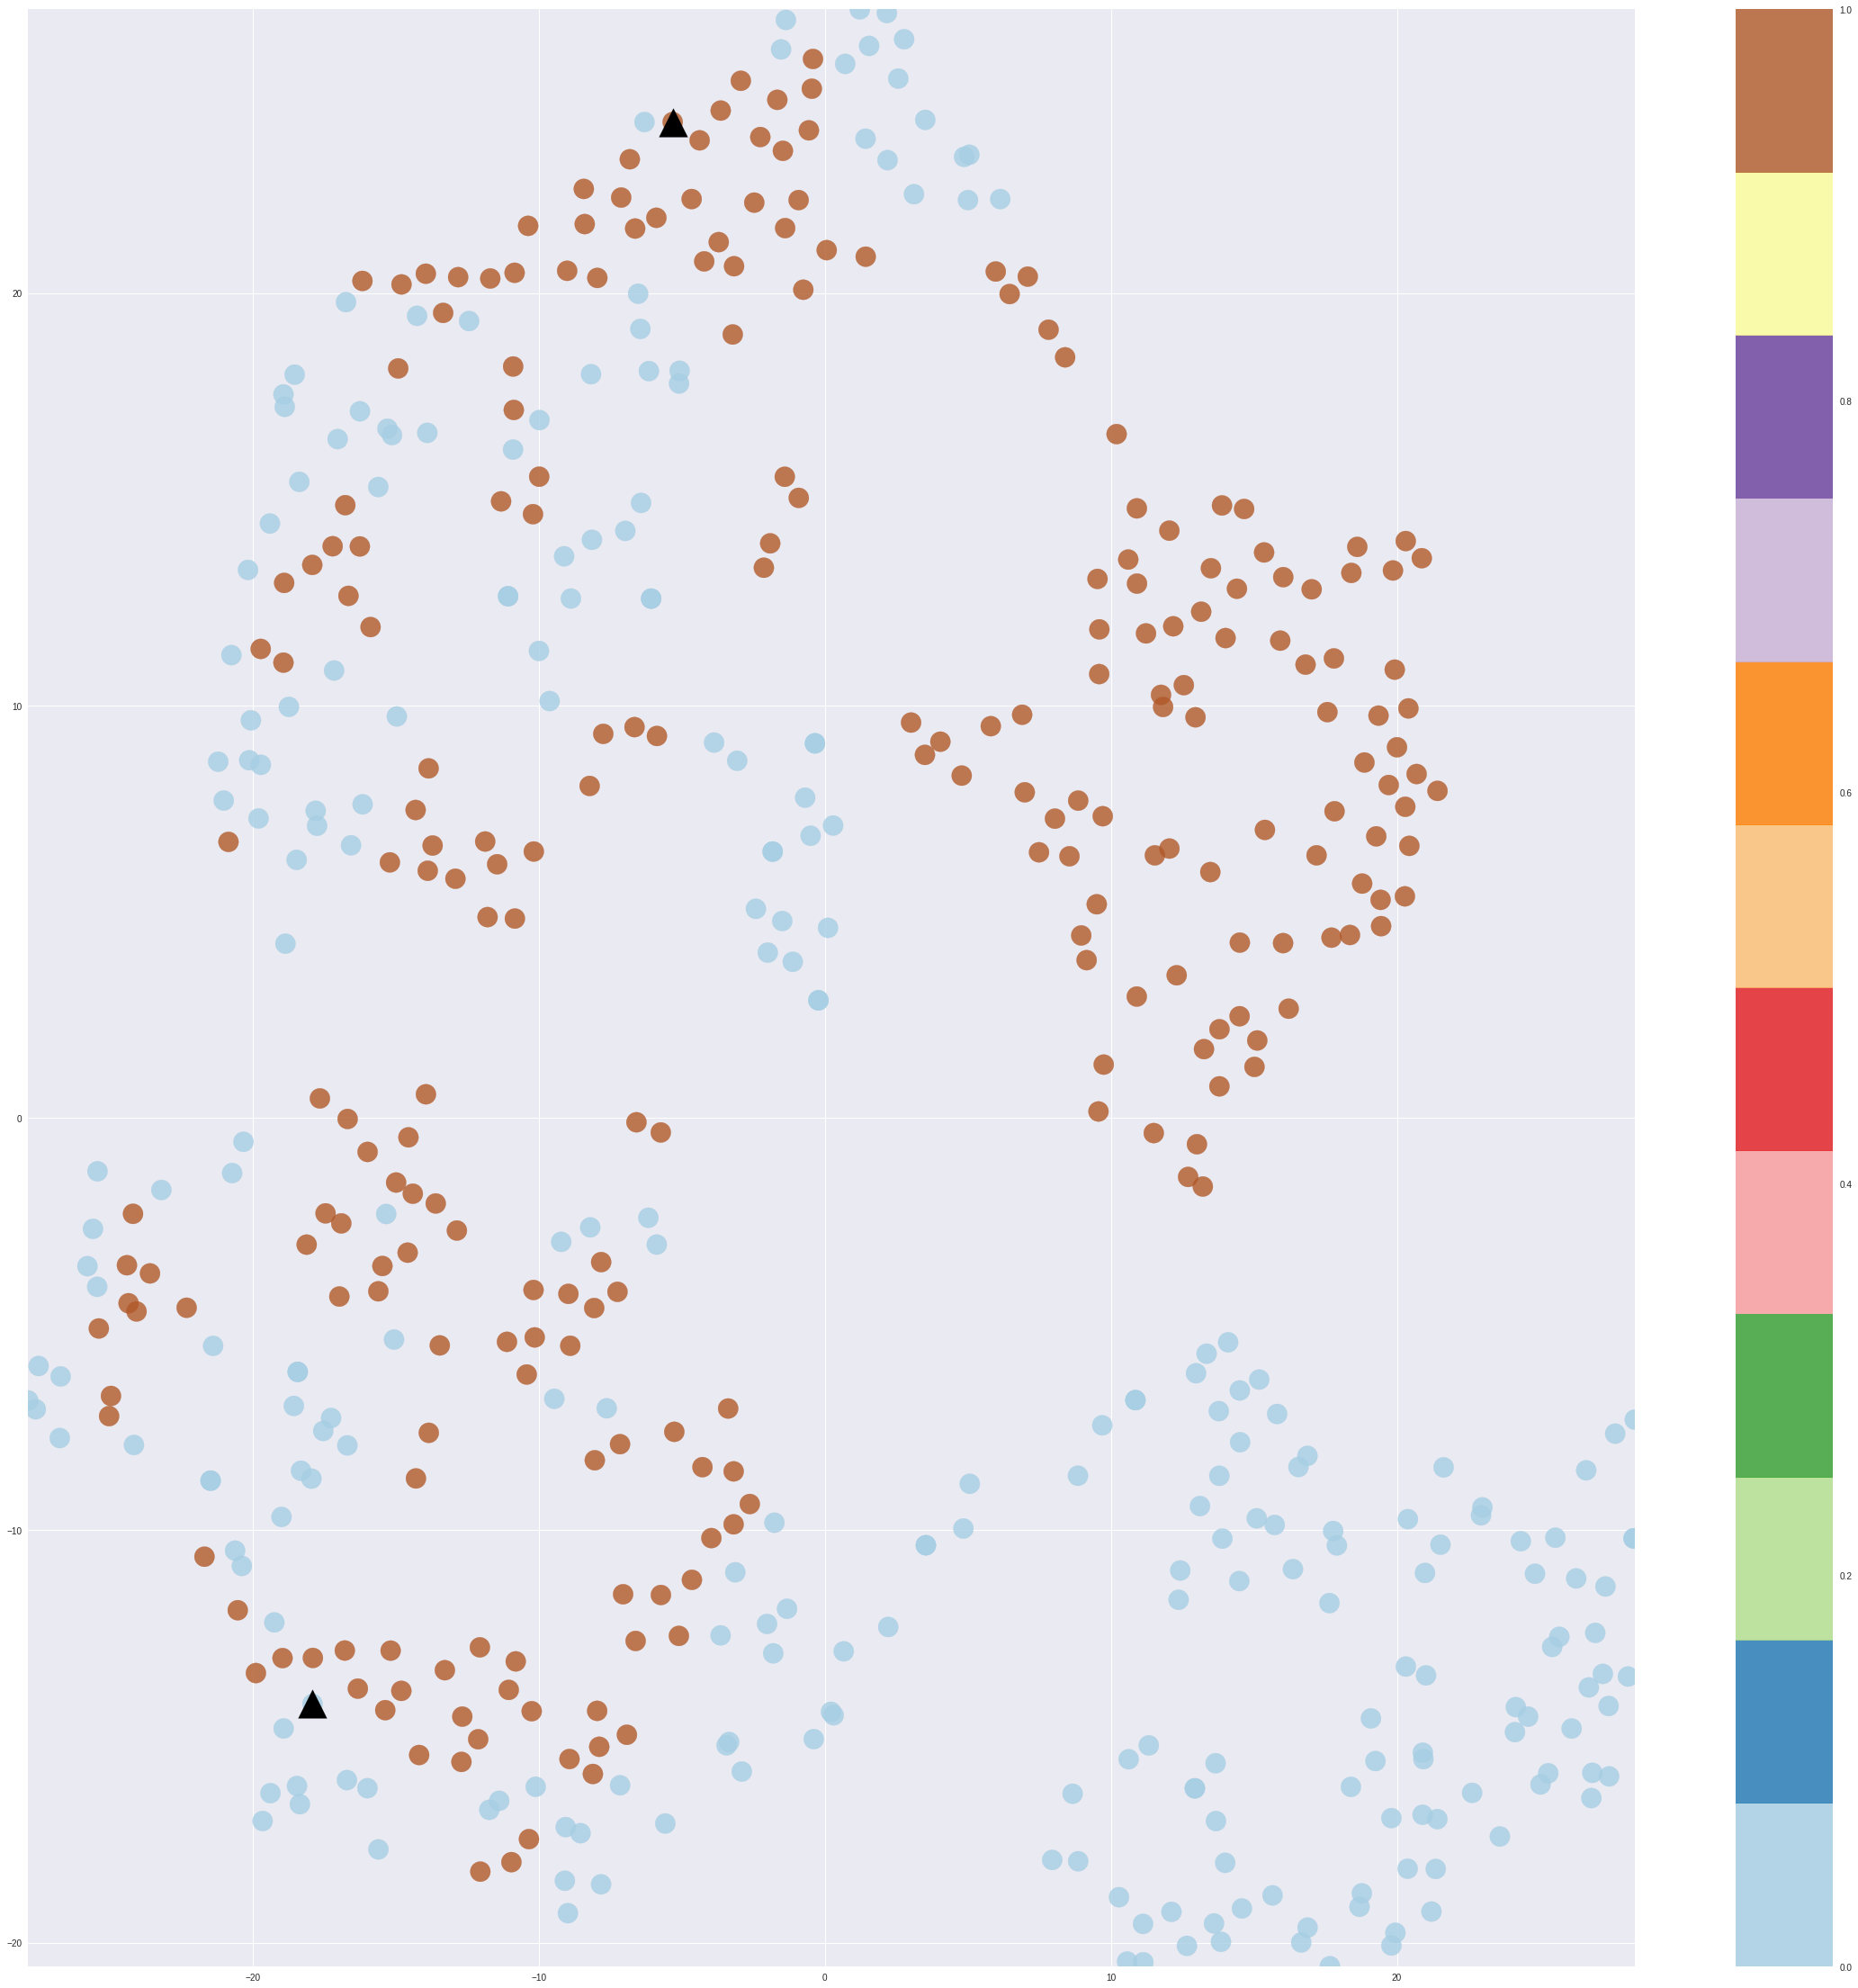

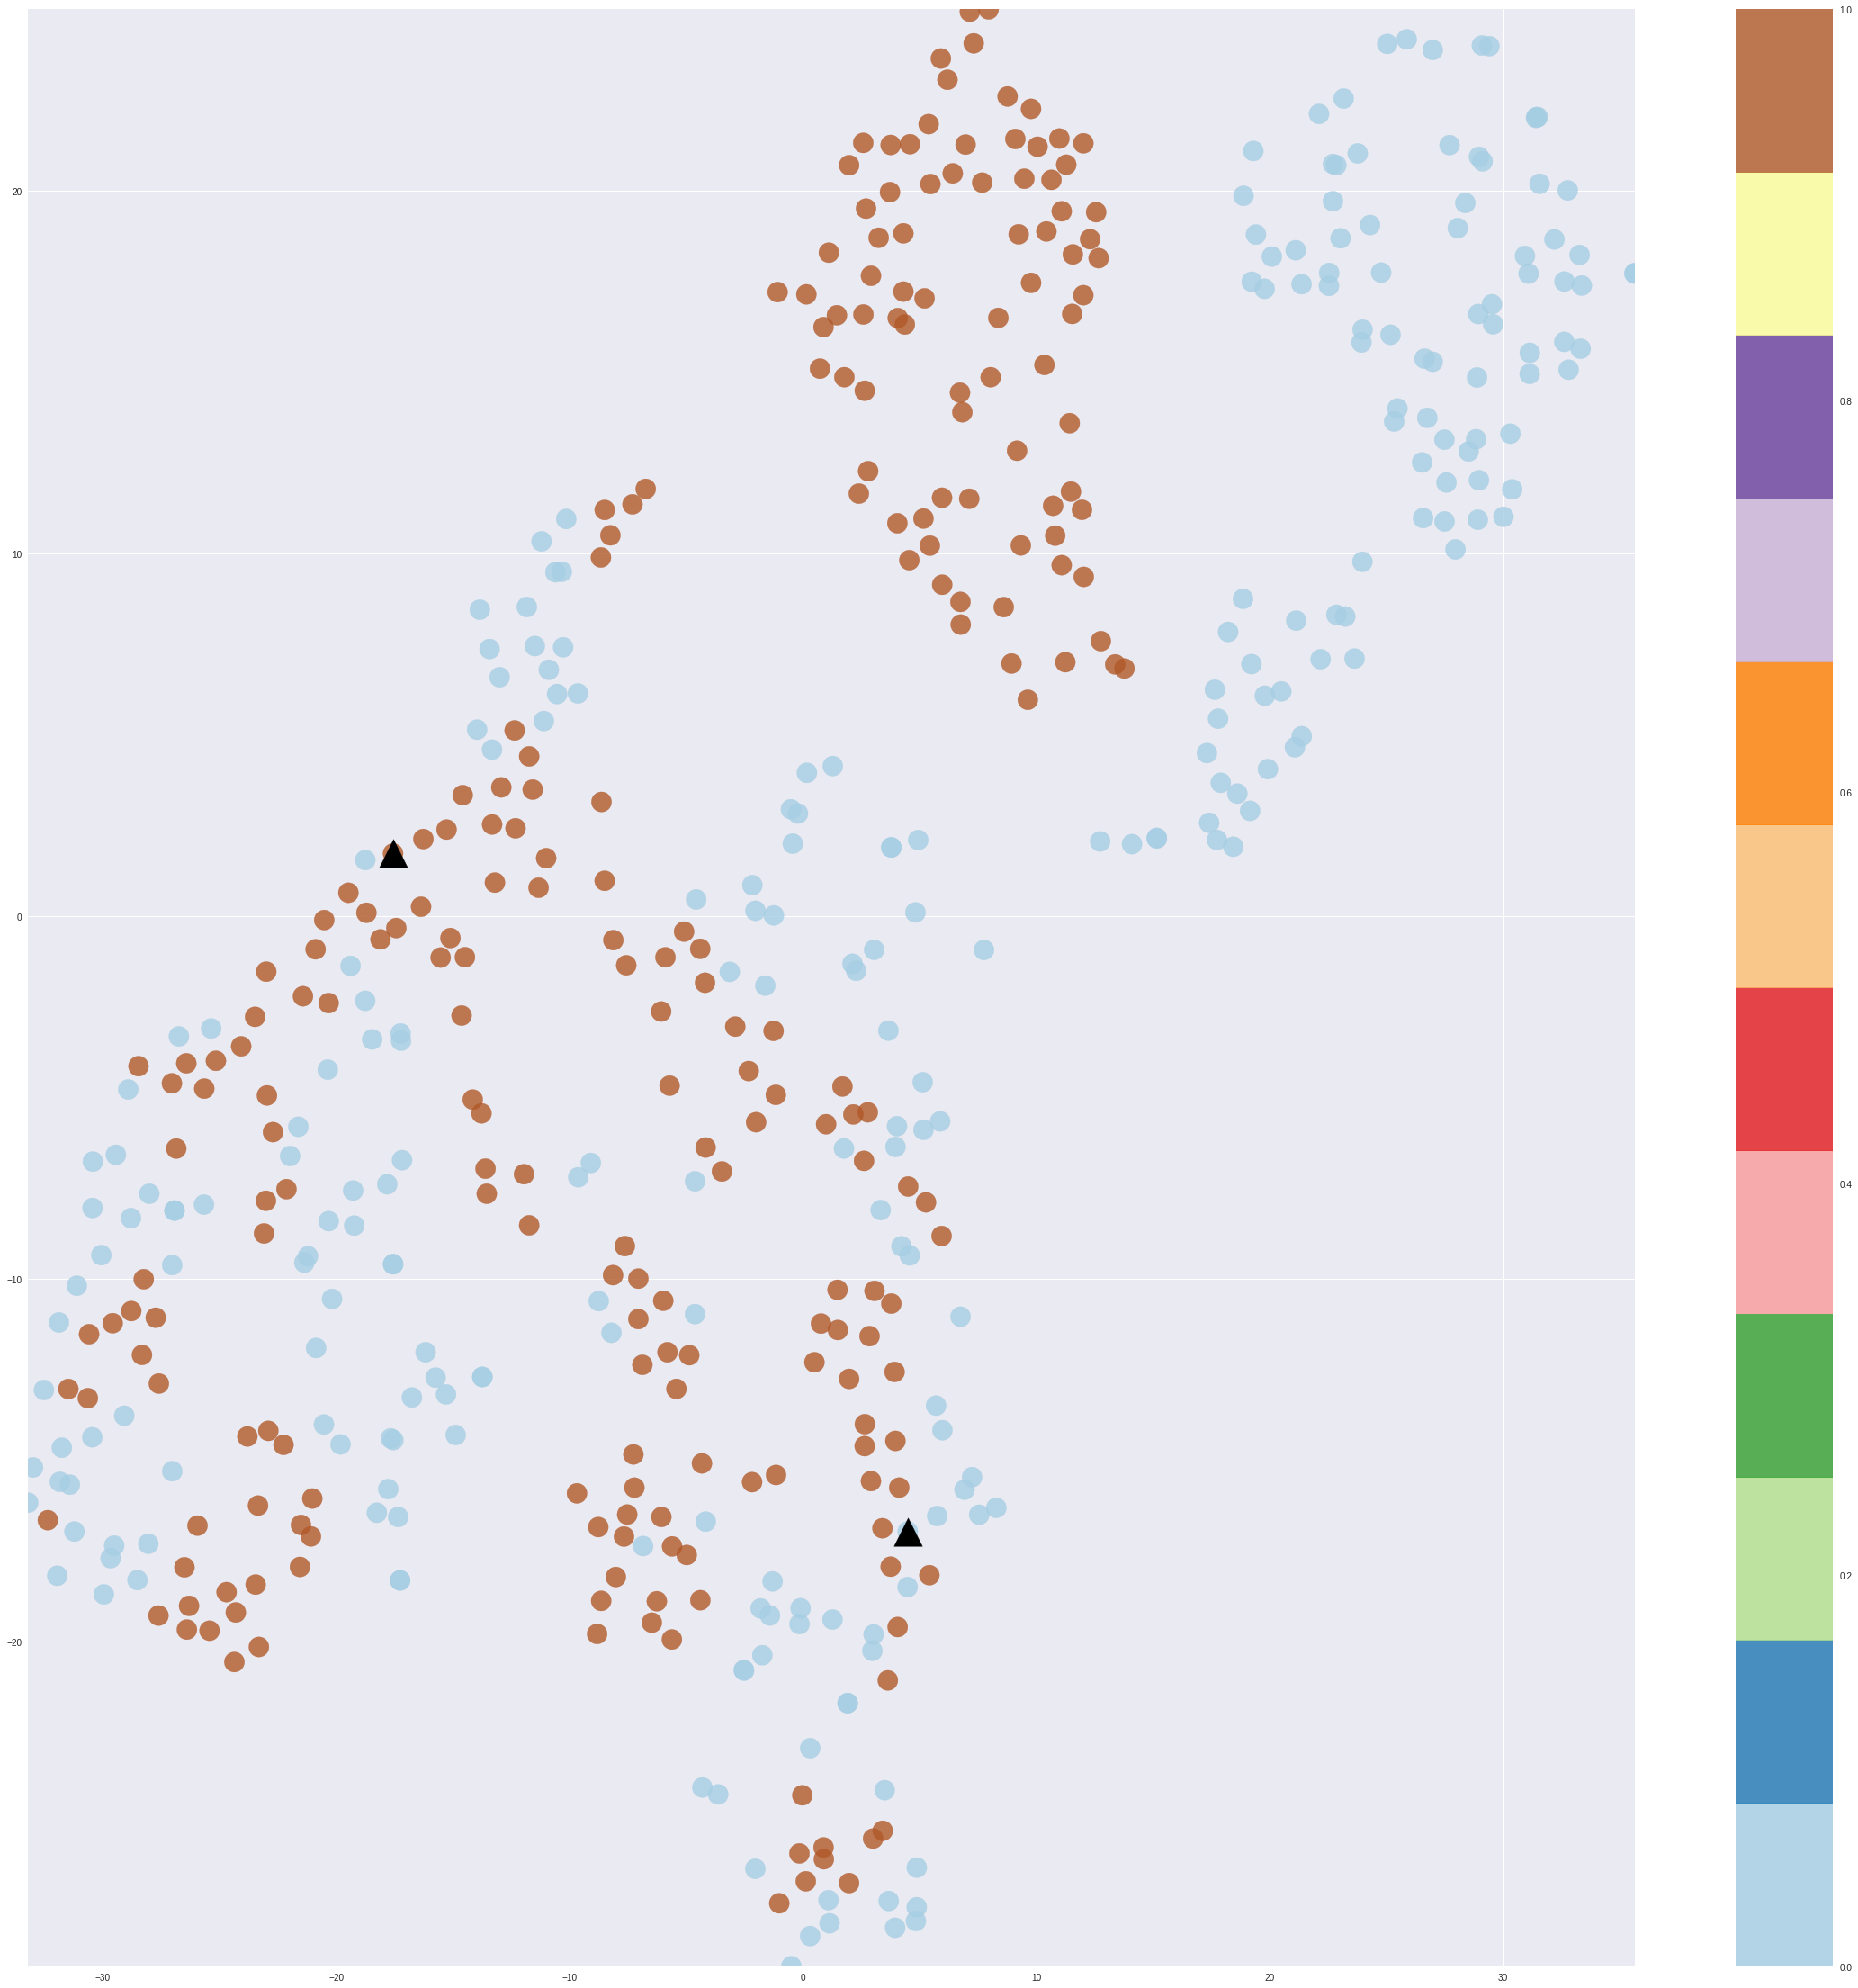

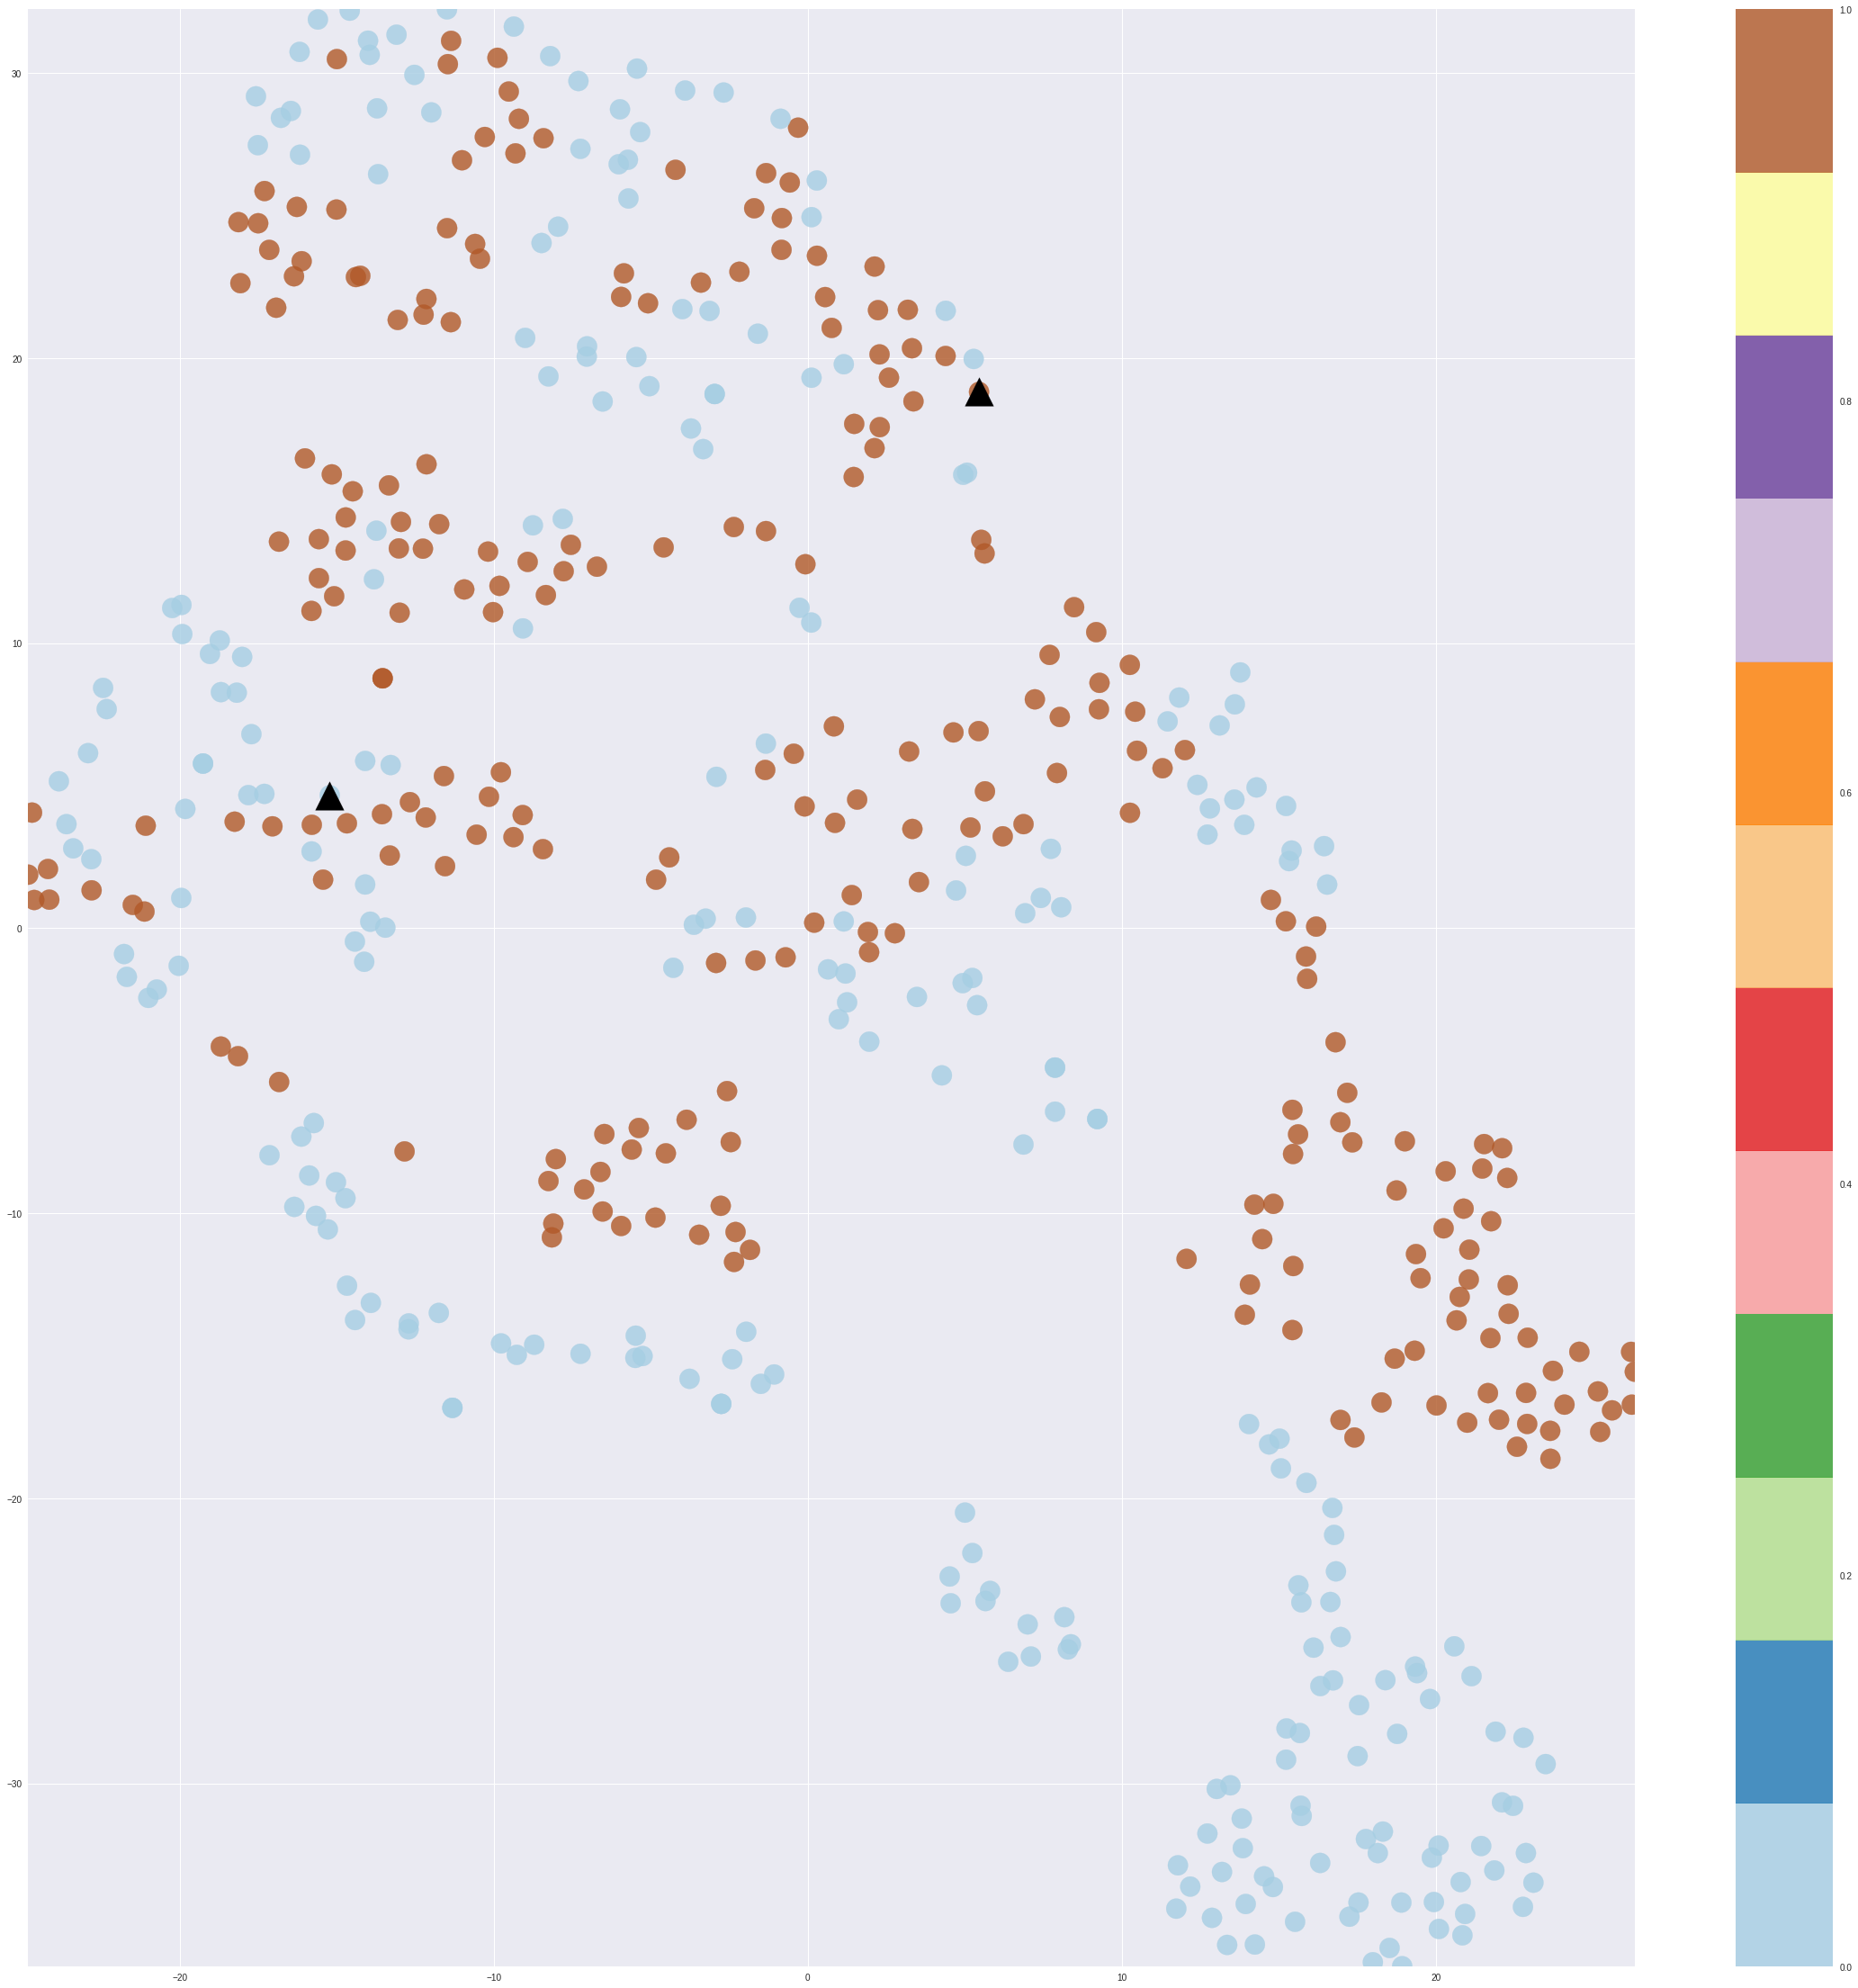

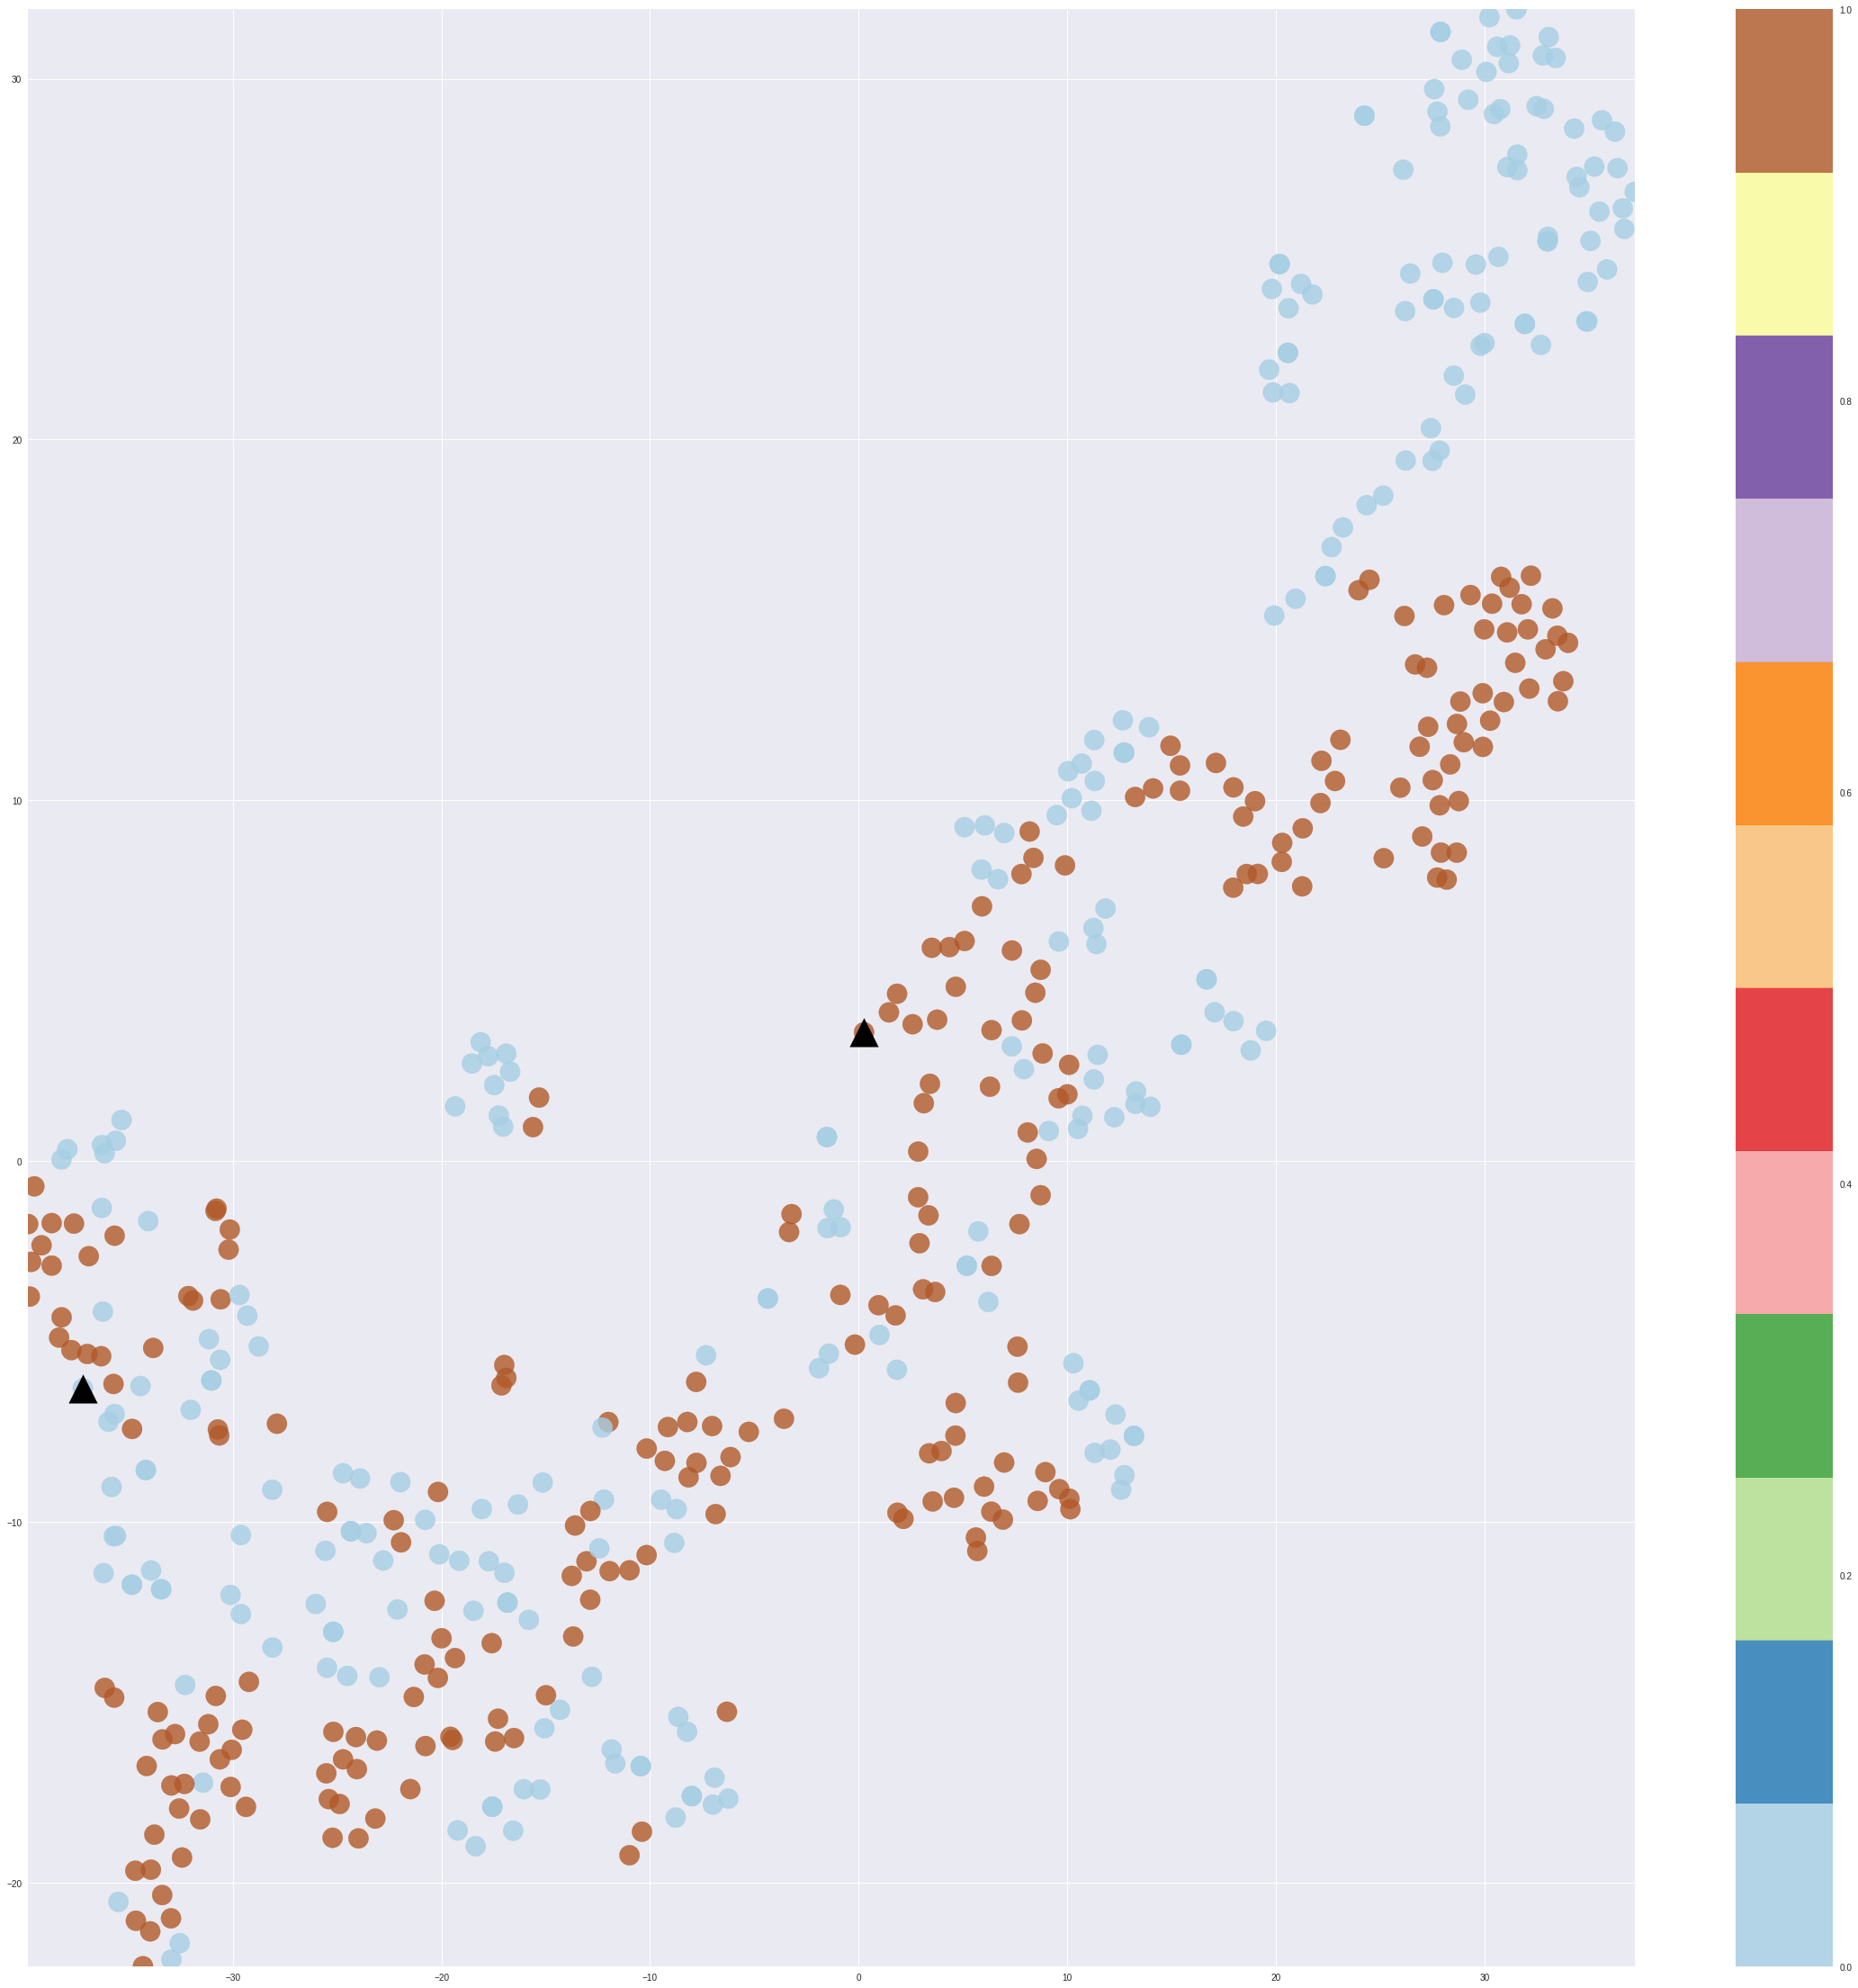

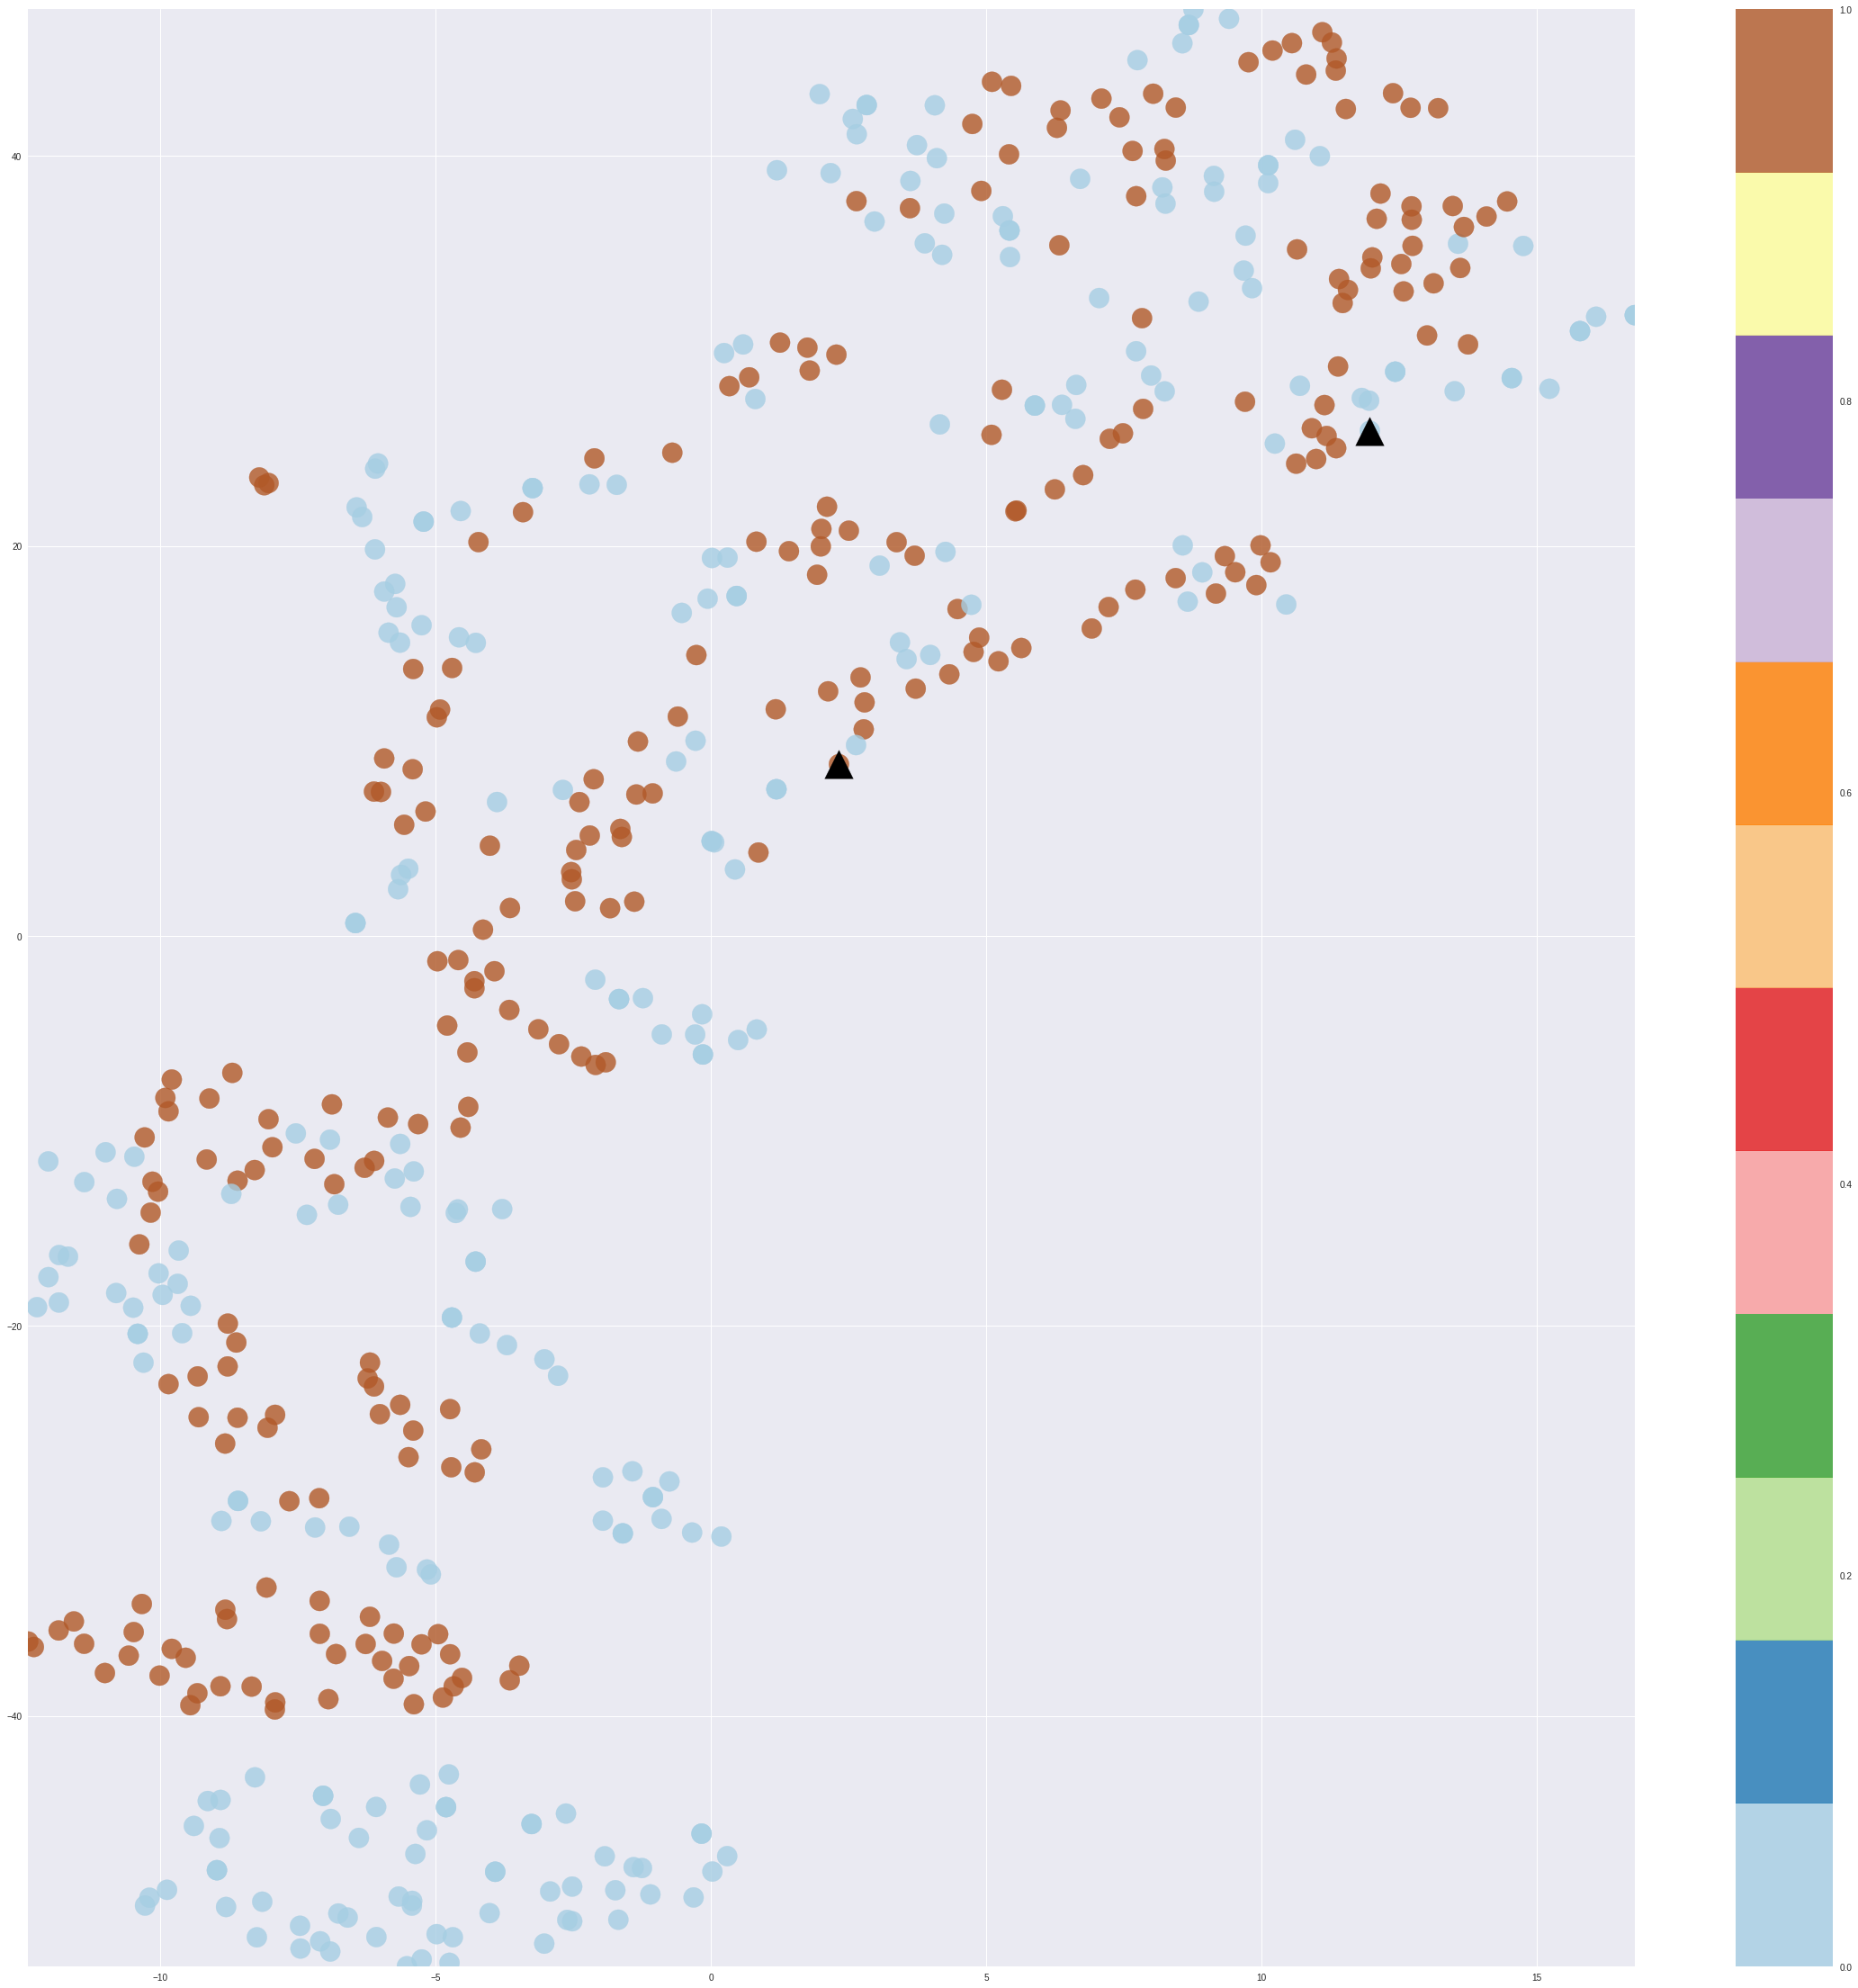

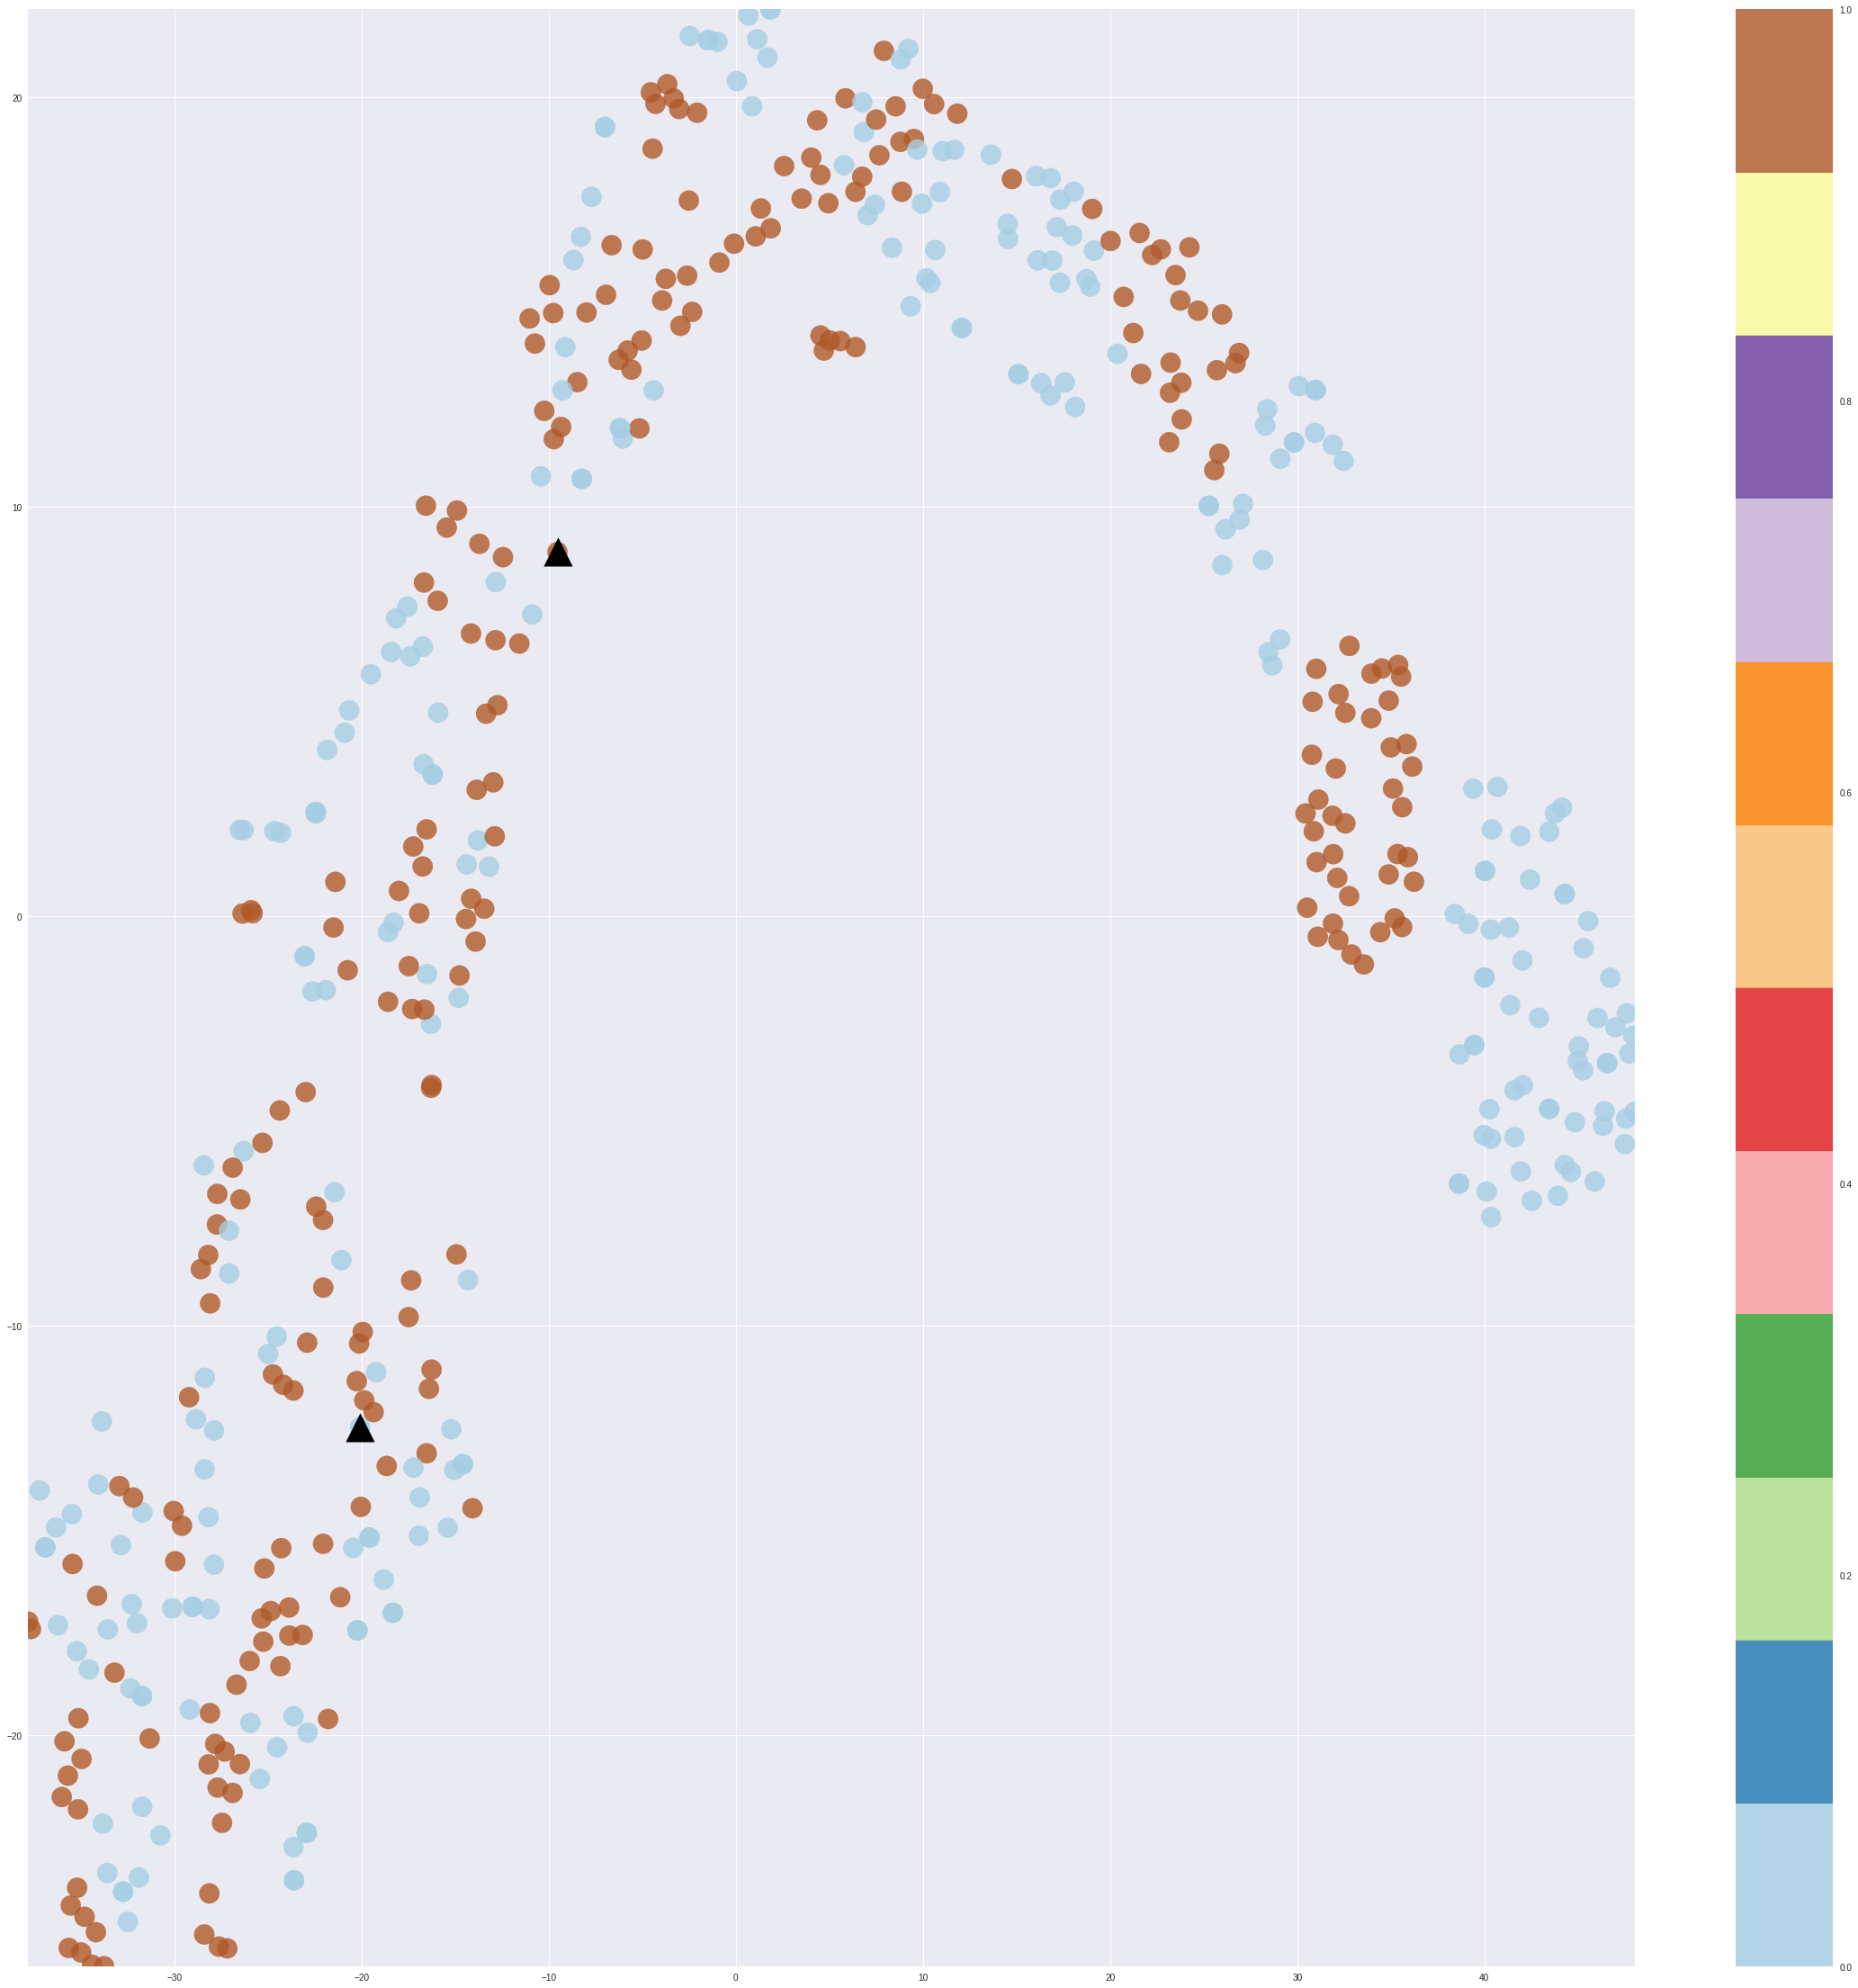

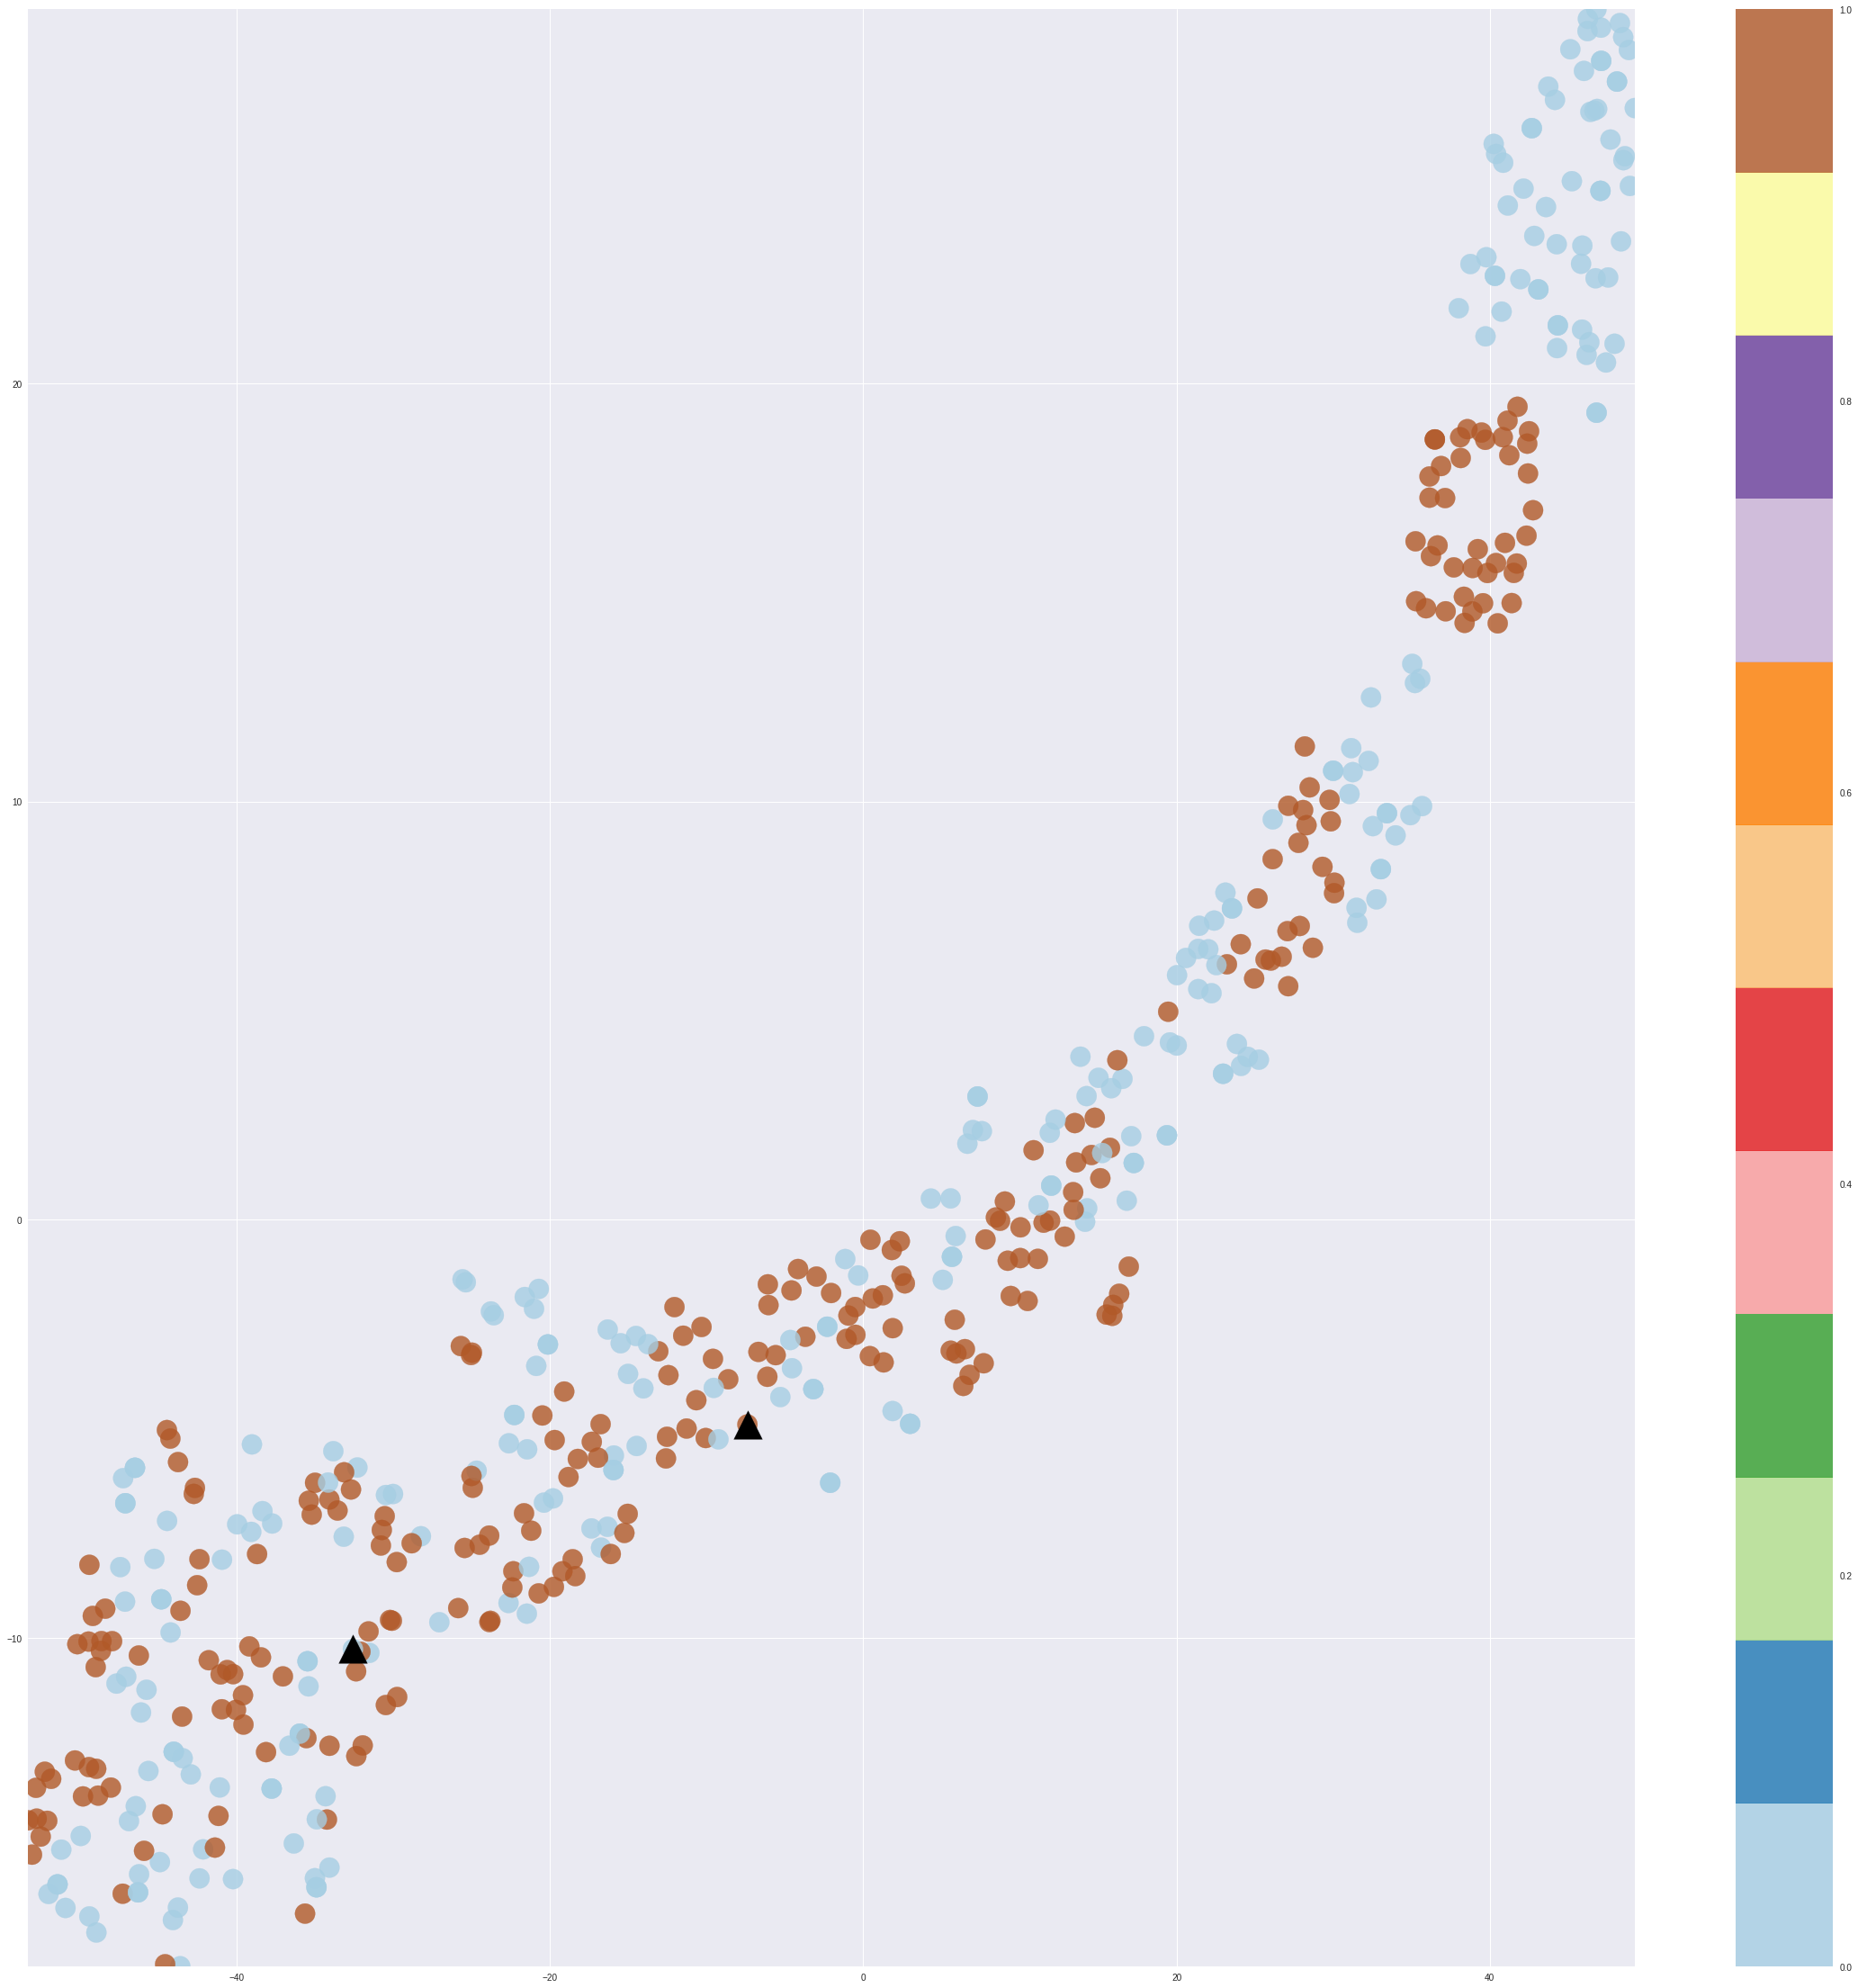

In [10]:
# coding:utf-8
import argparse
import os

import chainer
from chainer.datasets import mnist, tuple_dataset
from chainer import optimizers
from chainer import serializers
from chainer import cuda
from chainer.dataset import convert
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

from stacked_denoising_autoencoder import StackedDenoisingAutoEncoder
from deep_embedded_clustering import DeepEmbeddedClustering
from tdistribution_kl_divergence import tdistribution_kl_divergence
import pandas as pd

import easydict
import glob

def load_image():
    filepaths = glob.glob('img/*.JPG')    
    filepaths = [s for s in filepaths if 'red' not in s]
    f = open('text.txt', 'w') # 追記モードで開く    
    f.close()

    i = 0
    
    imageData = []
    labelData = []

    for filepath in filepaths:
        basename = os.path.basename(filepath).split('.')[0]
        img = Image.open(filepath).convert('L')  #Pillowで読み込み。'L'はグレースケールを意味する
        img = img.resize((28, 28)) # 32x32xにリサイズ
        label = None # ラベル(ファイル名)
        
        index1 = filepath.find('rectangle')
        index2 = filepath.find('red')
        
        # 0： 四角、白
        # 1： 円、白
        # 2： 四角、赤
        # 3： 円、赤
        
        if index1 !=-1:
          if index2 ==-1:
            label = 0
          else:
            label = 2
        else:
          if index2 ==-1:
            label = 1
          else:
            label = 3       
        
        x = np.asarray(np.float32(img)/255.0)
        x = x.reshape(28*28) # (チャネル、高さ、横幅)
        t = np.array(label, dtype=np.int32) 

        #datasets.append((x, t)) # xとtをタプルでリストに入れる
        imageData.append(x)
        labelData.append(t)
        f = open('text.txt', 'a') # 追記モードで開く
        f.write(str(label) + ', ' + basename + '\n') # 引数の文字列をファイルに書き込む
        f.close() # 
        
        i += 1
#     random.shuffle(datasets) # シャッフル
#     train = datasets[:1000] # 最初の千個を学習用
#     test = datasets[1000:1100] # 千個めから1100個目までをテスト用
    return tuple_dataset.TupleDataset(imageData, labelData), None

def plot_tsne(model, data, labels, seed, iter_num, save_dir):
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    with chainer.using_config("train", False):
        z = model(data)
        z.to_cpu()
        z = z.data
        centroids = model.get_centroids()
        centroids.to_cpu()
        centroids = centroids.data
        centroids_num = centroids.shape[0]
        data = np.vstack((z, centroids))
        tsne = TSNE(n_components=2, random_state=1, perplexity=30, n_iter=1000)
        x = tsne.fit_transform(data)
        x = x[:-centroids_num]
        embed_centroids = x[-centroids_num:]

        x1 = [data[0] for data in x]
        y1 = [data[1] for data in x]

        x_max = max(x1)
        x_min = min(x1)
        y_max = max(y1)
        y_min = min(y1)

        embx = [data[0] for data in embed_centroids]
        emvy = [data[1] for data in embed_centroids]

        plt.figure(figsize=(40, 40))
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.scatter(x1, y1, s=500, alpha=0.8, c=list(labels), cmap="Paired")
        plt.colorbar()
        plt.scatter(embx, emvy, s=1000, c="black", marker="^")
        filename = "{}/output_seed{}_iter{}.png".format(save_dir, seed, iter_num)
        plt.savefig(filename)
        print("save png")


def main():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--gpu', type=int, default=-1)
#     parser.add_argument('--seed', type=int, default=0)
#     parser.add_argument('--model_seed', type=int, default=0)
#     parser.add_argument('--cluster', type=int, default=10)
#     parser.add_argument('--stop_iter', type=int, default=30)
#     args = parser.parse_args()
    
    args = easydict.EasyDict({
      "gpu": 0,
      "seed": 0,
      "model_seed": 0,
      "cluster": 2,
      "stop_iter": 30
    })    
    
    gpu_id = args.gpu
    seed = args.seed
    model_seed = args.model_seed
    np.random.seed(seed)
    train, _ = load_image() # mnist.get_mnist()
    concat_train_data, concat_train_label = convert.concat_examples(train, device=gpu_id)
    perm = np.random.permutation(concat_train_data.shape[0])

    # Load Pretrain Model
    # 元データxiの低次元への変換にはニューラルネットを使います。
    # xiを低次元に変換したものをziとします。
    sdae = StackedDenoisingAutoEncoder(concat_train_data.shape[1])
    serializers.load_npz("drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master/StackedDenoisingAutoEncoder-seed{}.model".format(args.model_seed), sdae)
    chains = [dae for dae in sdae.children()]
    model = DeepEmbeddedClustering(chains)
    if chainer.cuda.available and args.gpu >= 0:
        model.to_gpu(gpu_id)

    # Initialize centroid
    k = args.cluster
    Z = model(concat_train_data)
    Z.to_cpu()
    Z = Z.data

    # ziに対してk-meansを実行してクラスタのセントロイドujを初期化します
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=seed).fit(Z)
    last_labels = kmeans.labels_
    
    df = pd.read_csv('text.txt', sep=',', header=None)
    df['cluster_no'] = last_labels
    df.to_csv('drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master/mapping.txt')
    
    if chainer.cuda.available and args.gpu >= 0:
        centroids = cuda.to_gpu(kmeans.cluster_centers_)
    else:
        centroids = kmeans.cluster_centers_

    model.add_centroids(centroids)
    optimizer = optimizers.MomentumSGD(lr=0.01)
    optimizer.setup(model)

    i = 0
    with chainer.using_config("train", False):
        # Not use Trainer because stop condition is difficult
        print("train DEC")
        while True:
            print("Epoch {}".format(i+1))
            Z = model(concat_train_data)
            centroids = model.get_centroids()
            loss = tdistribution_kl_divergence(Z, centroids)
            print("loss {}".format(loss.data))
            model.cleargrads()
            loss.backward()
            optimizer.update()
            if i % 5 == 0:
                new_labels = model.predict_label(concat_train_data)
                new_labels = cuda.to_cpu(new_labels)
                diff = float(len(np.where(np.equal(new_labels, last_labels) == False)[0])) / Z.shape[0]
                last_labels = new_labels
                plot_tsne(model, concat_train_data[perm[:500]], concat_train_label[perm[:500]], seed, i, "modelseed{}_seed{}".format(model_seed, seed))
                print("diff {}".format(diff))

            if diff <= 0.001:
                break

            if i > args.stop_iter:
                print("Couldn't reach tol")
                break

            i += 1

        outfile = "DeepEmbeddedClustering_modelseed{}_seed{}.model".format(model_seed, seed)
        serializers.save_npz(outfile, model)

if __name__ == '__main__':
    main()


In [24]:
ls

datalab/
DeepEmbeddedClustering_modelseed0_seed0.model
drive/
img/
mnist_result/
modelseed0_seed0/
StackedDenoisingAutoEncoder-seed0.model
text.txt


In [0]:
!cp StackedDenoisingAutoEncoder-seed0.model 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

In [24]:
ls modelseed0_seed0/

output_seed0_iter0.png   output_seed0_iter20.png  output_seed0_iter5.png
output_seed0_iter10.png  output_seed0_iter25.png
output_seed0_iter15.png  output_seed0_iter30.png


In [0]:
!cp -r modelseed0_seed0 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

In [0]:
!cp -r mnist_result 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

In [0]:
!cp text.txt 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

In [14]:
!cp mapping.txt 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

cp: cannot stat 'mapping.txt': No such file or directory


In [41]:
ls 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'

chainer_install_example.ipynb
change_learning_rate.py
deep_embedded_clustering.py
img/
LICENSE
main.py
mapping.txt
mnist_result/
modelseed0_seed0_4custers/
pretraining.py
__pycache__/
README.md
stacked_denoising_autoencoder.py
StackedDenoisingAutoEncoder-seed0_4clusters.model
StackedDenoisingAutoEncoder-seed0.model
tdistribution_kl_divergence.py
test/
text.txt
Untitled0.ipynb


In [37]:
filepath = 'img_ellipse_red_4101'
index1 = filepath.find('rectangle')
index2 = filepath.find('red')

# 0： 四角、白
# 1： 円、白
# 2： 四角、赤
# 3： 円、赤

if index1 !=-1:
  if index2 ==-1:
    label = 0
  else:
    label = 3
else:
  if index2 ==-1:
    label = 1
  else:
    label = 3       
print(index1)
print(index2)
print(label)

-1
12
3


In [61]:
filepaths = glob.glob('img/*')
filepaths = [s for s in filepaths if 'red' not in s]

print(len(filepaths))
filepaths

14000


['img/img_rectangle_0371.JPG',
 'img/img_ellipse_5794.JPG',
 'img/img_rectangle_1186.JPG',
 'img/img_rectangle_1749.JPG',
 'img/img_ellipse_5903.JPG',
 'img/img_rectangle_6356.JPG',
 'img/img_rectangle_2620.JPG',
 'img/img_ellipse_4195.JPG',
 'img/img_rectangle_6291.JPG',
 'img/img_ellipse_4497.JPG',
 'img/img_ellipse_5888.JPG',
 'img/img_rectangle_6796.JPG',
 'img/img_rectangle_5878.JPG',
 'img/img_rectangle_6419.JPG',
 'img/img_rectangle_2327.JPG',
 'img/img_rectangle_5563.JPG',
 'img/img_ellipse_0331.JPG',
 'img/img_rectangle_5134.JPG',
 'img/img_rectangle_6053.JPG',
 'img/img_rectangle_4452.JPG',
 'img/img_ellipse_6202.JPG',
 'img/img_rectangle_0987.JPG',
 'img/img_rectangle_6988.JPG',
 'img/img_rectangle_4444.JPG',
 'img/img_ellipse_4026.JPG',
 'img/img_rectangle_6888.JPG',
 'img/img_rectangle_0031.JPG',
 'img/img_rectangle_0899.JPG',
 'img/img_ellipse_3181.JPG',
 'img/img_rectangle_2433.JPG',
 'img/img_rectangle_3086.JPG',
 'img/img_ellipse_0936.JPG',
 'img/img_rectangle_5384.JPG